In [42]:
import re
from collections import defaultdict

log_text = """
Epoch: [0] [ 0/548] eta: 1:58:18 lr: 0.000003 loss: 4.6533 (4.6533) loss_classifier: 1.9296 (1.9296) loss_box_reg: 0.0826 (0.0826) loss_mask: 2.5490 (2.5490) loss_objectness: 0.0842 (0.0842) loss_rpn_box_reg: 0.0079 (0.0079) time: 12.9532 data: 4.5548 max mem: 5817 Epoch: [0] [100/548] eta: 0:04:49 lr: 0.000185 loss: 0.8283 (1.7730) loss_classifier: 0.1452 (0.4952) loss_box_reg: 0.0924 (0.0900) loss_mask: 0.5359 (1.0890) loss_objectness: 0.0455 (0.0916) loss_rpn_box_reg: 0.0048 (0.0072) time: 0.5188 data: 0.0198 max mem: 5991 Epoch: [0] [200/548] eta: 0:03:24 lr: 0.000368 loss: 0.7401 (1.2738) loss_classifier: 0.1732 (0.3322) loss_box_reg: 0.1252 (0.1044) loss_mask: 0.3961 (0.7651) loss_objectness: 0.0271 (0.0654) loss_rpn_box_reg: 0.0052 (0.0067) time: 0.5265 data: 0.0217 max mem: 5991 Epoch: [0] [300/548] eta: 0:02:20 lr: 0.000551 loss: 0.6888 (1.0892) loss_classifier: 0.1687 (0.2789) loss_box_reg: 0.1388 (0.1144) loss_mask: 0.3671 (0.6372) loss_objectness: 0.0218 (0.0525) loss_rpn_box_reg: 0.0050 (0.0063) time: 0.5256 data: 0.0190 max mem: 5991 Epoch: [0] [400/548] eta: 0:01:22 lr: 0.000733 loss: 0.6726 (0.9887) loss_classifier: 0.1573 (0.2494) loss_box_reg: 0.1406 (0.1216) loss_mask: 0.3559 (0.5673) loss_objectness: 0.0187 (0.0445) loss_rpn_box_reg: 0.0047 (0.0059) time: 0.5414 data: 0.0319 max mem: 5991 Epoch: [0] [500/548] eta: 0:00:26 lr: 0.000916 loss: 0.6273 (0.9211) loss_classifier: 0.1387 (0.2289) loss_box_reg: 0.1314 (0.1250) loss_mask: 0.3355 (0.5220) loss_objectness: 0.0131 (0.0395) loss_rpn_box_reg: 0.0042 (0.0057) time: 0.5292 data: 0.0203 max mem: 5991 Epoch: [0] [547/548] eta: 0:00:00 lr: 0.001000 loss: 0.6352 (0.8966) loss_classifier: 0.1419 (0.2215) loss_box_reg: 0.1396 (0.1263) loss_mask: 0.3208 (0.5053) loss_objectness: 0.0162 (0.0377) loss_rpn_box_reg: 0.0039 (0.0056) time: 0.5201 data: 0.0225 max mem: 5991 Epoch: [0] Total time: 0:05:02 (0.5515 s / it)

Epoch: [1] [ 0/548] eta: 0:30:11 lr: 0.001000 loss: 0.5664 (0.5664) loss_classifier: 0.1179 (0.1179) loss_box_reg: 0.1273 (0.1273) loss_mask: 0.3064 (0.3064) loss_objectness: 0.0114 (0.0114) loss_rpn_box_reg: 0.0033 (0.0033) time: 3.3061 data: 2.5949 max mem: 5991 Epoch: [1] [100/548] eta: 0:04:20 lr: 0.001000 loss: 0.5870 (0.5931) loss_classifier: 0.1302 (0.1305) loss_box_reg: 0.1208 (0.1250) loss_mask: 0.3072 (0.3170) loss_objectness: 0.0149 (0.0162) loss_rpn_box_reg: 0.0042 (0.0044) time: 0.5433 data: 0.0338 max mem: 5991 Epoch: [1] [200/548] eta: 0:03:14 lr: 0.001000 loss: 0.5697 (0.5831) loss_classifier: 0.1265 (0.1282) loss_box_reg: 0.1191 (0.1233) loss_mask: 0.2951 (0.3118) loss_objectness: 0.0131 (0.0154) loss_rpn_box_reg: 0.0038 (0.0044) time: 0.5351 data: 0.0223 max mem: 5991 Epoch: [1] [300/548] eta: 0:02:16 lr: 0.001000 loss: 0.5317 (0.5783) loss_classifier: 0.1145 (0.1274) loss_box_reg: 0.1125 (0.1217) loss_mask: 0.2826 (0.3099) loss_objectness: 0.0115 (0.0149) loss_rpn_box_reg: 0.0036 (0.0044) time: 0.5343 data: 0.0212 max mem: 5991 Epoch: [1] [400/548] eta: 0:01:21 lr: 0.001000 loss: 0.5412 (0.5733) loss_classifier: 0.1190 (0.1266) loss_box_reg: 0.1161 (0.1201) loss_mask: 0.2963 (0.3076) loss_objectness: 0.0115 (0.0148) loss_rpn_box_reg: 0.0035 (0.0042) time: 0.5308 data: 0.0187 max mem: 5991 Epoch: [1] [500/548] eta: 0:00:26 lr: 0.001000 loss: 0.5500 (0.5653) loss_classifier: 0.1291 (0.1241) loss_box_reg: 0.1145 (0.1183) loss_mask: 0.2966 (0.3044) loss_objectness: 0.0116 (0.0143) loss_rpn_box_reg: 0.0039 (0.0041) time: 0.5415 data: 0.0259 max mem: 5991 Epoch: [1] [547/548] eta: 0:00:00 lr: 0.001000 loss: 0.5410 (0.5637) loss_classifier: 0.1036 (0.1234) loss_box_reg: 0.1102 (0.1180) loss_mask: 0.3029 (0.3040) loss_objectness: 0.0141 (0.0142) loss_rpn_box_reg: 0.0040 (0.0041) time: 0.5126 data: 0.0177 max mem: 5991 Epoch: [1] Total time: 0:04:58 (0.5442 s / it)

Epoch: [2] [ 0/548] eta: 0:35:36 lr: 0.001000 loss: 0.5247 (0.5247) loss_classifier: 0.1064 (0.1064) loss_box_reg: 0.1074 (0.1074) loss_mask: 0.2967 (0.2967) loss_objectness: 0.0091 (0.0091) loss_rpn_box_reg: 0.0051 (0.0051) time: 3.8992 data: 3.0807 max mem: 5991 Epoch: [2] [100/548] eta: 0:04:19 lr: 0.001000 loss: 0.5092 (0.5066) loss_classifier: 0.1115 (0.1080) loss_box_reg: 0.1031 (0.1068) loss_mask: 0.2878 (0.2786) loss_objectness: 0.0077 (0.0097) loss_rpn_box_reg: 0.0038 (0.0036) time: 0.5450 data: 0.0310 max mem: 5991 Epoch: [2] [200/548] eta: 0:03:14 lr: 0.001000 loss: 0.4653 (0.5112) loss_classifier: 0.0975 (0.1096) loss_box_reg: 0.0975 (0.1083) loss_mask: 0.2563 (0.2792) loss_objectness: 0.0075 (0.0105) loss_rpn_box_reg: 0.0029 (0.0036) time: 0.5330 data: 0.0195 max mem: 5991 Epoch: [2] [300/548] eta: 0:02:16 lr: 0.001000 loss: 0.4967 (0.5091) loss_classifier: 0.0976 (0.1088) loss_box_reg: 0.1042 (0.1078) loss_mask: 0.2726 (0.2782) loss_objectness: 0.0090 (0.0107) loss_rpn_box_reg: 0.0037 (0.0036) time: 0.5320 data: 0.0188 max mem: 5991 Epoch: [2] [400/548] eta: 0:01:20 lr: 0.001000 loss: 0.4574 (0.5063) loss_classifier: 0.0939 (0.1080) loss_box_reg: 0.0960 (0.1068) loss_mask: 0.2558 (0.2772) loss_objectness: 0.0098 (0.0107) loss_rpn_box_reg: 0.0031 (0.0036) time: 0.5324 data: 0.0210 max mem: 5991 Epoch: [2] [500/548] eta: 0:00:26 lr: 0.001000 loss: 0.5054 (0.5058) loss_classifier: 0.0971 (0.1073) loss_box_reg: 0.1106 (0.1071) loss_mask: 0.2812 (0.2771) loss_objectness: 0.0118 (0.0107) loss_rpn_box_reg: 0.0035 (0.0036) time: 0.5449 data: 0.0330 max mem: 5991 Epoch: [2] [547/548] eta: 0:00:00 lr: 0.001000 loss: 0.5051 (0.5058) loss_classifier: 0.1063 (0.1075) loss_box_reg: 0.0993 (0.1070) loss_mask: 0.2811 (0.2769) loss_objectness: 0.0076 (0.0107) loss_rpn_box_reg: 0.0028 (0.0036) time: 0.5172 data: 0.0215 max mem: 5991 Epoch: [2] Total time: 0:04:58 (0.5441 s / it)

Epoch: [3] [ 0/548] eta: 0:48:21 lr: 0.000100 loss: 0.3713 (0.3713) loss_classifier: 0.0534 (0.0534) loss_box_reg: 0.0699 (0.0699) loss_mask: 0.2428 (0.2428) loss_objectness: 0.0036 (0.0036) loss_rpn_box_reg: 0.0016 (0.0016) time: 5.2941 data: 4.7208 max mem: 5991 Epoch: [3] [100/548] eta: 0:04:22 lr: 0.000100 loss: 0.4706 (0.4583) loss_classifier: 0.0947 (0.0944) loss_box_reg: 0.0963 (0.0977) loss_mask: 0.2455 (0.2549) loss_objectness: 0.0062 (0.0080) loss_rpn_box_reg: 0.0034 (0.0032) time: 0.5487 data: 0.0326 max mem: 5991 Epoch: [3] [200/548] eta: 0:03:15 lr: 0.000100 loss: 0.4651 (0.4547) loss_classifier: 0.0957 (0.0934) loss_box_reg: 0.1075 (0.0973) loss_mask: 0.2537 (0.2527) loss_objectness: 0.0086 (0.0081) loss_rpn_box_reg: 0.0034 (0.0032) time: 0.5352 data: 0.0191 max mem: 5991 Epoch: [3] [300/548] eta: 0:02:17 lr: 0.000100 loss: 0.4367 (0.4531) loss_classifier: 0.0849 (0.0929) loss_box_reg: 0.1014 (0.0971) loss_mask: 0.2484 (0.2519) loss_objectness: 0.0058 (0.0080) loss_rpn_box_reg: 0.0028 (0.0032) time: 0.5371 data: 0.0225 max mem: 5991 Epoch: [3] [400/548] eta: 0:01:21 lr: 0.000100 loss: 0.4627 (0.4539) loss_classifier: 0.0885 (0.0934) loss_box_reg: 0.1017 (0.0973) loss_mask: 0.2587 (0.2520) loss_objectness: 0.0075 (0.0079) loss_rpn_box_reg: 0.0027 (0.0032) time: 0.5336 data: 0.0203 max mem: 5991 Epoch: [3] [500/548] eta: 0:00:26 lr: 0.000100 loss: 0.4059 (0.4527) loss_classifier: 0.0807 (0.0928) loss_box_reg: 0.0867 (0.0975) loss_mask: 0.2381 (0.2511) loss_objectness: 0.0057 (0.0080) loss_rpn_box_reg: 0.0028 (0.0032) time: 0.5485 data: 0.0328 max mem: 5991 Epoch: [3] [547/548] eta: 0:00:00 lr: 0.000100 loss: 0.4304 (0.4527) loss_classifier: 0.0821 (0.0929) loss_box_reg: 0.0963 (0.0977) loss_mask: 0.2350 (0.2509) loss_objectness: 0.0066 (0.0080) loss_rpn_box_reg: 0.0030 (0.0032) time: 0.5188 data: 0.0197 max mem: 5991 Epoch: [3] Total time: 0:04:59 (0.5458 s / it)

Epoch: [4] [ 0/548] eta: 0:46:59 lr: 0.000100 loss: 0.4194 (0.4194) loss_classifier: 0.0705 (0.0705) loss_box_reg: 0.0949 (0.0949) loss_mask: 0.2484 (0.2484) loss_objectness: 0.0022 (0.0022) loss_rpn_box_reg: 0.0034 (0.0034) time: 5.1443 data: 4.5216 max mem: 5991 Epoch: [4] [100/548] eta: 0:04:20 lr: 0.000100 loss: 0.4451 (0.4355) loss_classifier: 0.1009 (0.0886) loss_box_reg: 0.0990 (0.0933) loss_mask: 0.2389 (0.2433) loss_objectness: 0.0067 (0.0072) loss_rpn_box_reg: 0.0028 (0.0031) time: 0.5328 data: 0.0193 max mem: 5991 Epoch: [4] [200/548] eta: 0:03:14 lr: 0.000100 loss: 0.4498 (0.4361) loss_classifier: 0.0947 (0.0883) loss_box_reg: 0.0905 (0.0941) loss_mask: 0.2426 (0.2433) loss_objectness: 0.0076 (0.0073) loss_rpn_box_reg: 0.0026 (0.0032) time: 0.5324 data: 0.0192 max mem: 5991 Epoch: [4] [300/548] eta: 0:02:16 lr: 0.000100 loss: 0.4525 (0.4399) loss_classifier: 0.0927 (0.0888) loss_box_reg: 0.0944 (0.0950) loss_mask: 0.2484 (0.2454) loss_objectness: 0.0078 (0.0075) loss_rpn_box_reg: 0.0026 (0.0031) time: 0.5346 data: 0.0217 max mem: 5991 Epoch: [4] [400/548] eta: 0:01:21 lr: 0.000100 loss: 0.4427 (0.4417) loss_classifier: 0.0908 (0.0900) loss_box_reg: 0.0884 (0.0954) loss_mask: 0.2448 (0.2456) loss_objectness: 0.0063 (0.0076) loss_rpn_box_reg: 0.0029 (0.0031) time: 0.5465 data: 0.0330 max mem: 5991 Epoch: [4] [500/548] eta: 0:00:26 lr: 0.000100 loss: 0.4342 (0.4437) loss_classifier: 0.0921 (0.0906) loss_box_reg: 0.0939 (0.0963) loss_mask: 0.2446 (0.2460) loss_objectness: 0.0077 (0.0076) loss_rpn_box_reg: 0.0030 (0.0032) time: 0.5341 data: 0.0190 max mem: 5991 Epoch: [4] [547/548] eta: 0:00:00 lr: 0.000100 loss: 0.4327 (0.4436) loss_classifier: 0.0842 (0.0903) loss_box_reg: 0.0920 (0.0962) loss_mask: 0.2438 (0.2463) loss_objectness: 0.0054 (0.0076) loss_rpn_box_reg: 0.0029 (0.0032) time: 0.5172 data: 0.0200 max mem: 5991 Epoch: [4] Total time: 0:04:58 (0.5448 s / it)
"""

# 각 에폭에 대한 데이터를 저장할 딕셔너리
data = defaultdict(list)

# 정규식 패턴
pattern = r"Epoch: \[(\d+)\].*lr: (\d+\.\d+).*loss: (\d+\.\d+).*loss_classifier: (\d+\.\d+).*loss_box_reg: (\d+\.\d+).*loss_mask: (\d+\.\d+).*loss_objectness: (\d+\.\d+).*loss_rpn_box_reg: (\d+\.\d+).*time: (\d+\.\d+).*data: (\d+\.\d+).*max mem: (\d+)"

# 로그에서 정보 파싱
matches = re.findall(pattern, log_text)

for match in matches:
    epoch, lr, loss, loss_classifier, loss_box_reg, loss_mask, loss_objectness, loss_rpn_box_reg, time, data_time, max_mem = match
    epoch = int(epoch)
    lr = float(lr)
    loss = float(loss)
    loss_classifier = float(loss_classifier)
    loss_box_reg = float(loss_box_reg)
    loss_mask = float(loss_mask)
    loss_objectness = float(loss_objectness)
    loss_rpn_box_reg = float(loss_rpn_box_reg)
    time = float(time)
    data_time = float(data_time)
    max_mem = int(max_mem)

    data[epoch].append({
        'lr': lr,
        'loss': loss,
        'loss_classifier': loss_classifier,
        'loss_box_reg': loss_box_reg,
        'loss_mask': loss_mask,
        'loss_objectness': loss_objectness,
        'loss_rpn_box_reg': loss_rpn_box_reg,
        'time': time,
        'data_time': data_time,
        'max_mem': max_mem
    })

print(data)

defaultdict(<class 'list'>, {0: [{'lr': 0.001, 'loss': 0.6352, 'loss_classifier': 0.1419, 'loss_box_reg': 0.1396, 'loss_mask': 0.3208, 'loss_objectness': 0.0162, 'loss_rpn_box_reg': 0.0039, 'time': 0.5201, 'data_time': 0.0225, 'max_mem': 5991}], 1: [{'lr': 0.001, 'loss': 0.541, 'loss_classifier': 0.1036, 'loss_box_reg': 0.1102, 'loss_mask': 0.3029, 'loss_objectness': 0.0141, 'loss_rpn_box_reg': 0.004, 'time': 0.5126, 'data_time': 0.0177, 'max_mem': 5991}], 2: [{'lr': 0.001, 'loss': 0.5051, 'loss_classifier': 0.1063, 'loss_box_reg': 0.0993, 'loss_mask': 0.2811, 'loss_objectness': 0.0076, 'loss_rpn_box_reg': 0.0028, 'time': 0.5172, 'data_time': 0.0215, 'max_mem': 5991}], 3: [{'lr': 0.0001, 'loss': 0.4304, 'loss_classifier': 0.0821, 'loss_box_reg': 0.0963, 'loss_mask': 0.235, 'loss_objectness': 0.0066, 'loss_rpn_box_reg': 0.003, 'time': 0.5188, 'data_time': 0.0197, 'max_mem': 5991}], 4: [{'lr': 0.0001, 'loss': 0.4327, 'loss_classifier': 0.0842, 'loss_box_reg': 0.092, 'loss_mask': 0.2438, 

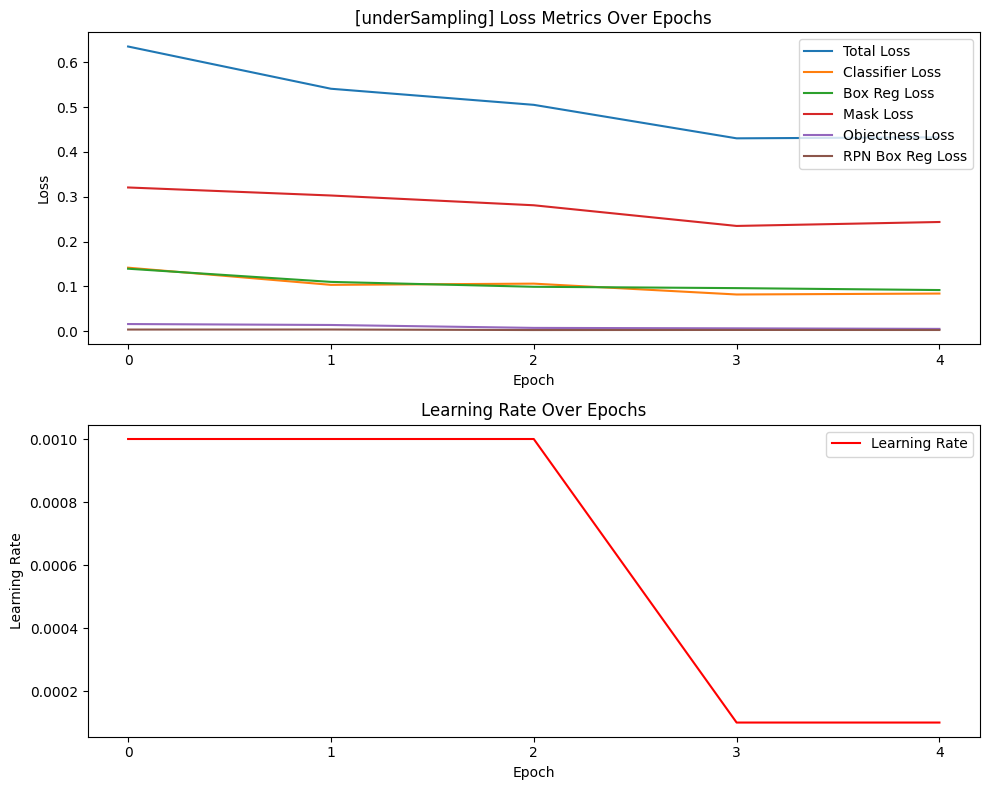

In [46]:
import matplotlib.pyplot as plt
from collections import defaultdict

# 주어진 데이터
data = {0: [{'lr': 0.001, 'loss': 0.6352, 'loss_classifier': 0.1419, 'loss_box_reg': 0.1396, 'loss_mask': 0.3208, 'loss_objectness': 0.0162, 'loss_rpn_box_reg': 0.0039, 'time': 0.5201, 'data_time': 0.0225, 'max_mem': 5991}],
        1: [{'lr': 0.001, 'loss': 0.541, 'loss_classifier': 0.1036, 'loss_box_reg': 0.1102, 'loss_mask': 0.3029, 'loss_objectness': 0.0141, 'loss_rpn_box_reg': 0.004, 'time': 0.5126, 'data_time': 0.0177, 'max_mem': 5991}],
        2: [{'lr': 0.001, 'loss': 0.5051, 'loss_classifier': 0.1063, 'loss_box_reg': 0.0993, 'loss_mask': 0.2811, 'loss_objectness': 0.0076, 'loss_rpn_box_reg': 0.0028, 'time': 0.5172, 'data_time': 0.0215, 'max_mem': 5991}],
        3: [{'lr': 0.0001, 'loss': 0.4304, 'loss_classifier': 0.0821, 'loss_box_reg': 0.0963, 'loss_mask': 0.235, 'loss_objectness': 0.0066, 'loss_rpn_box_reg': 0.003, 'time': 0.5188, 'data_time': 0.0197, 'max_mem': 5991}],
        4: [{'lr': 0.0001, 'loss': 0.4327, 'loss_classifier': 0.0842, 'loss_box_reg': 0.092, 'loss_mask': 0.2438, 'loss_objectness': 0.0054, 'loss_rpn_box_reg': 0.0029, 'time': 0.5172, 'data_time': 0.02, 'max_mem': 5991}]}

# 데이터를 처리하기 쉬운 형태로 변환
epochs = list(data.keys())
losses = [entry[0]['loss'] for entry in data.values()]
loss_classifier = [entry[0]['loss_classifier'] for entry in data.values()]
loss_box_reg = [entry[0]['loss_box_reg'] for entry in data.values()]
loss_mask = [entry[0]['loss_mask'] for entry in data.values()]
loss_objectness = [entry[0]['loss_objectness'] for entry in data.values()]
loss_rpn_box_reg = [entry[0]['loss_rpn_box_reg'] for entry in data.values()]
lr = [entry[0]['lr'] for entry in data.values()]

# 시각화
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs, losses, label='Total Loss')
plt.plot(epochs, loss_classifier, label='Classifier Loss')
plt.plot(epochs, loss_box_reg, label='Box Reg Loss')
plt.plot(epochs, loss_mask, label='Mask Loss')
plt.plot(epochs, loss_objectness, label='Objectness Loss')
plt.plot(epochs, loss_rpn_box_reg, label='RPN Box Reg Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('[underSampling] Loss Metrics Over Epochs')
plt.xticks(x)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, lr, label='Learning Rate', color='r')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Over Epochs')
plt.xticks(x)
plt.legend()

plt.tight_layout()

plt.show()


2.

In [47]:
import re
from collections import defaultdict

log_text = """
Epoch: [0] [ 0/875] eta: 3:04:04 lr: 0.000002 loss: 3.3126 (3.3126) loss_classifier: 1.6686 (1.6686) loss_box_reg: 0.1053 (0.1053) loss_mask: 1.4619 (1.4619) loss_objectness: 0.0694 (0.0694) loss_rpn_box_reg: 0.0074 (0.0074) time: 12.6225 data: 3.9197 max mem: 5818 Epoch: [0] [100/875] eta: 0:08:18 lr: 0.000116 loss: 0.8861 (1.7407) loss_classifier: 0.1556 (0.5298) loss_box_reg: 0.1016 (0.0913) loss_mask: 0.5502 (1.0119) loss_objectness: 0.0508 (0.0995) loss_rpn_box_reg: 0.0057 (0.0082) time: 0.5261 data: 0.0247 max mem: 5991 Epoch: [0] [200/875] eta: 0:06:36 lr: 0.000231 loss: 0.7587 (1.2695) loss_classifier: 0.1657 (0.3491) loss_box_reg: 0.1232 (0.1052) loss_mask: 0.4350 (0.7369) loss_objectness: 0.0384 (0.0710) loss_rpn_box_reg: 0.0055 (0.0073) time: 0.5338 data: 0.0300 max mem: 5991 Epoch: [0] [300/875] eta: 0:05:27 lr: 0.000345 loss: 0.7549 (1.0992) loss_classifier: 0.1794 (0.2917) loss_box_reg: 0.1507 (0.1157) loss_mask: 0.3887 (0.6272) loss_objectness: 0.0251 (0.0576) loss_rpn_box_reg: 0.0057 (0.0069) time: 0.5319 data: 0.0224 max mem: 5991 Epoch: [0] [400/875] eta: 0:04:25 lr: 0.000459 loss: 0.7200 (1.0103) loss_classifier: 0.1690 (0.2628) loss_box_reg: 0.1593 (0.1243) loss_mask: 0.3721 (0.5671) loss_objectness: 0.0178 (0.0496) loss_rpn_box_reg: 0.0053 (0.0066) time: 0.5327 data: 0.0234 max mem: 5991 Epoch: [0] [500/875] eta: 0:03:28 lr: 0.000574 loss: 0.7216 (0.9531) loss_classifier: 0.1643 (0.2447) loss_box_reg: 0.1447 (0.1294) loss_mask: 0.3710 (0.5283) loss_objectness: 0.0190 (0.0443) loss_rpn_box_reg: 0.0046 (0.0063) time: 0.5354 data: 0.0267 max mem: 5991 Epoch: [0] [600/875] eta: 0:02:31 lr: 0.000688 loss: 0.6772 (0.9099) loss_classifier: 0.1500 (0.2304) loss_box_reg: 0.1452 (0.1321) loss_mask: 0.3509 (0.5008) loss_objectness: 0.0176 (0.0404) loss_rpn_box_reg: 0.0045 (0.0061) time: 0.5409 data: 0.0314 max mem: 5991 Epoch: [0] [700/875] eta: 0:01:36 lr: 0.000802 loss: 0.6478 (0.8733) loss_classifier: 0.1424 (0.2190) loss_box_reg: 0.1309 (0.1330) loss_mask: 0.3374 (0.4781) loss_objectness: 0.0131 (0.0372) loss_rpn_box_reg: 0.0047 (0.0060) time: 0.5329 data: 0.0222 max mem: 5991 Epoch: [0] [800/875] eta: 0:00:41 lr: 0.000917 loss: 0.6343 (0.8433) loss_classifier: 0.1361 (0.2094) loss_box_reg: 0.1367 (0.1333) loss_mask: 0.3209 (0.4602) loss_objectness: 0.0123 (0.0346) loss_rpn_box_reg: 0.0043 (0.0058) time: 0.5327 data: 0.0217 max mem: 5991 Epoch: [0] [874/875] eta: 0:00:00 lr: 0.001000 loss: 0.6245 (0.8253) loss_classifier: 0.1334 (0.2037) loss_box_reg: 0.1364 (0.1335) loss_mask: 0.3307 (0.4494) loss_objectness: 0.0135 (0.0331) loss_rpn_box_reg: 0.0046 (0.0057) time: 0.5293 data: 0.0180 max mem: 5991 Epoch: [0] Total time: 0:07:58 (0.5465 s / it)

Epoch: [1] [ 0/875] eta: 1:26:03 lr: 0.001000 loss: 0.5943 (0.5943) loss_classifier: 0.1318 (0.1318) loss_box_reg: 0.1398 (0.1398) loss_mask: 0.3088 (0.3088) loss_objectness: 0.0104 (0.0104) loss_rpn_box_reg: 0.0035 (0.0035) time: 5.9007 data: 5.3636 max mem: 5991 Epoch: [1] [100/875] eta: 0:07:37 lr: 0.001000 loss: 0.5726 (0.6072) loss_classifier: 0.1154 (0.1322) loss_box_reg: 0.1228 (0.1313) loss_mask: 0.3119 (0.3236) loss_objectness: 0.0125 (0.0154) loss_rpn_box_reg: 0.0041 (0.0047) time: 0.5359 data: 0.0250 max mem: 5991 Epoch: [1] [200/875] eta: 0:06:20 lr: 0.001000 loss: 0.6144 (0.6100) loss_classifier: 0.1333 (0.1330) loss_box_reg: 0.1395 (0.1335) loss_mask: 0.3182 (0.3240) loss_objectness: 0.0126 (0.0146) loss_rpn_box_reg: 0.0048 (0.0049) time: 0.5350 data: 0.0203 max mem: 5991 Epoch: [1] [300/875] eta: 0:05:18 lr: 0.001000 loss: 0.5762 (0.6049) loss_classifier: 0.1166 (0.1315) loss_box_reg: 0.1215 (0.1319) loss_mask: 0.3127 (0.3221) loss_objectness: 0.0123 (0.0146) loss_rpn_box_reg: 0.0032 (0.0047) time: 0.5325 data: 0.0212 max mem: 5991 Epoch: [1] [400/875] eta: 0:04:21 lr: 0.001000 loss: 0.5713 (0.6006) loss_classifier: 0.1224 (0.1300) loss_box_reg: 0.1277 (0.1303) loss_mask: 0.3061 (0.3213) loss_objectness: 0.0107 (0.0144) loss_rpn_box_reg: 0.0041 (0.0046) time: 0.5424 data: 0.0292 max mem: 5992 Epoch: [1] [500/875] eta: 0:03:25 lr: 0.001000 loss: 0.5621 (0.5930) loss_classifier: 0.1202 (0.1271) loss_box_reg: 0.1231 (0.1287) loss_mask: 0.2993 (0.3186) loss_objectness: 0.0112 (0.0140) loss_rpn_box_reg: 0.0034 (0.0045) time: 0.5364 data: 0.0239 max mem: 5992 Epoch: [1] [600/875] eta: 0:02:29 lr: 0.001000 loss: 0.5820 (0.5881) loss_classifier: 0.1234 (0.1253) loss_box_reg: 0.1175 (0.1280) loss_mask: 0.3143 (0.3164) loss_objectness: 0.0126 (0.0140) loss_rpn_box_reg: 0.0041 (0.0045) time: 0.5326 data: 0.0198 max mem: 5992 Epoch: [1] [700/875] eta: 0:01:35 lr: 0.001000 loss: 0.5734 (0.5859) loss_classifier: 0.1169 (0.1246) loss_box_reg: 0.1198 (0.1281) loss_mask: 0.3084 (0.3146) loss_objectness: 0.0117 (0.0140) loss_rpn_box_reg: 0.0034 (0.0045) time: 0.5361 data: 0.0219 max mem: 5992 Epoch: [1] [800/875] eta: 0:00:40 lr: 0.001000 loss: 0.5576 (0.5830) loss_classifier: 0.1188 (0.1238) loss_box_reg: 0.1271 (0.1278) loss_mask: 0.2993 (0.3133) loss_objectness: 0.0091 (0.0137) loss_rpn_box_reg: 0.0040 (0.0044) time: 0.5383 data: 0.0238 max mem: 5992 Epoch: [1] [874/875] eta: 0:00:00 lr: 0.001000 loss: 0.5722 (0.5810) loss_classifier: 0.1269 (0.1234) loss_box_reg: 0.1291 (0.1273) loss_mask: 0.3070 (0.3123) loss_objectness: 0.0093 (0.0135) loss_rpn_box_reg: 0.0044 (0.0044) time: 0.5281 data: 0.0156 max mem: 5992 Epoch: [1] Total time: 0:07:55 (0.5429 s / it)

Epoch: [2] [ 0/875] eta: 1:19:48 lr: 0.001000 loss: 0.5152 (0.5152) loss_classifier: 0.1030 (0.1030) loss_box_reg: 0.1076 (0.1076) loss_mask: 0.2927 (0.2927) loss_objectness: 0.0070 (0.0070) loss_rpn_box_reg: 0.0048 (0.0048) time: 5.4723 data: 4.8800 max mem: 5992 Epoch: [2] [100/875] eta: 0:07:35 lr: 0.001000 loss: 0.5118 (0.5362) loss_classifier: 0.1030 (0.1099) loss_box_reg: 0.1177 (0.1178) loss_mask: 0.2785 (0.2927) loss_objectness: 0.0102 (0.0116) loss_rpn_box_reg: 0.0032 (0.0041) time: 0.5474 data: 0.0353 max mem: 5992 Epoch: [2] [200/875] eta: 0:06:20 lr: 0.001000 loss: 0.5029 (0.5370) loss_classifier: 0.1024 (0.1113) loss_box_reg: 0.1112 (0.1185) loss_mask: 0.2869 (0.2923) loss_objectness: 0.0086 (0.0109) loss_rpn_box_reg: 0.0032 (0.0040) time: 0.5337 data: 0.0201 max mem: 5992 Epoch: [2] [300/875] eta: 0:05:18 lr: 0.001000 loss: 0.5262 (0.5361) loss_classifier: 0.1048 (0.1108) loss_box_reg: 0.1145 (0.1191) loss_mask: 0.2873 (0.2914) loss_objectness: 0.0092 (0.0109) loss_rpn_box_reg: 0.0035 (0.0040) time: 0.5332 data: 0.0206 max mem: 5992 Epoch: [2] [400/875] eta: 0:04:21 lr: 0.001000 loss: 0.5205 (0.5344) loss_classifier: 0.1019 (0.1103) loss_box_reg: 0.1108 (0.1191) loss_mask: 0.2885 (0.2905) loss_objectness: 0.0088 (0.0105) loss_rpn_box_reg: 0.0040 (0.0040) time: 0.5329 data: 0.0223 max mem: 5992 Epoch: [2] [500/875] eta: 0:03:25 lr: 0.001000 loss: 0.5268 (0.5332) loss_classifier: 0.1042 (0.1095) loss_box_reg: 0.1208 (0.1190) loss_mask: 0.2893 (0.2903) loss_objectness: 0.0083 (0.0104) loss_rpn_box_reg: 0.0039 (0.0040) time: 0.5410 data: 0.0305 max mem: 5992 Epoch: [2] [600/875] eta: 0:02:30 lr: 0.001000 loss: 0.5075 (0.5321) loss_classifier: 0.1036 (0.1090) loss_box_reg: 0.1105 (0.1190) loss_mask: 0.2786 (0.2898) loss_objectness: 0.0067 (0.0104) loss_rpn_box_reg: 0.0031 (0.0040) time: 0.5328 data: 0.0198 max mem: 5992 Epoch: [2] [700/875] eta: 0:01:35 lr: 0.001000 loss: 0.5221 (0.5319) loss_classifier: 0.1097 (0.1088) loss_box_reg: 0.1252 (0.1191) loss_mask: 0.2882 (0.2897) loss_objectness: 0.0074 (0.0104) loss_rpn_box_reg: 0.0033 (0.0039) time: 0.5362 data: 0.0216 max mem: 5992 Epoch: [2] [800/875] eta: 0:00:40 lr: 0.001000 loss: 0.5217 (0.5304) loss_classifier: 0.1006 (0.1084) loss_box_reg: 0.1153 (0.1190) loss_mask: 0.2877 (0.2888) loss_objectness: 0.0088 (0.0103) loss_rpn_box_reg: 0.0033 (0.0039) time: 0.5357 data: 0.0227 max mem: 5992 Epoch: [2] [874/875] eta: 0:00:00 lr: 0.001000 loss: 0.5130 (0.5293) loss_classifier: 0.1032 (0.1082) loss_box_reg: 0.1053 (0.1186) loss_mask: 0.2738 (0.2883) loss_objectness: 0.0082 (0.0103) loss_rpn_box_reg: 0.0038 (0.0039) time: 0.5267 data: 0.0154 max mem: 5992 Epoch: [2] Total time: 0:07:55 (0.5437 s / it)

Epoch: [3] [ 0/875] eta: 1:19:23 lr: 0.000100 loss: 0.5085 (0.5085) loss_classifier: 0.0948 (0.0948) loss_box_reg: 0.1138 (0.1138) loss_mask: 0.2872 (0.2872) loss_objectness: 0.0107 (0.0107) loss_rpn_box_reg: 0.0021 (0.0021) time: 5.4445 data: 4.8651 max mem: 5992 Epoch: [3] [100/875] eta: 0:07:34 lr: 0.000100 loss: 0.4931 (0.4931) loss_classifier: 0.0941 (0.0983) loss_box_reg: 0.1093 (0.1114) loss_mask: 0.2696 (0.2711) loss_objectness: 0.0055 (0.0087) loss_rpn_box_reg: 0.0036 (0.0037) time: 0.5453 data: 0.0309 max mem: 5992 Epoch: [3] [200/875] eta: 0:06:20 lr: 0.000100 loss: 0.4895 (0.4854) loss_classifier: 0.0904 (0.0957) loss_box_reg: 0.1045 (0.1108) loss_mask: 0.2579 (0.2670) loss_objectness: 0.0068 (0.0084) loss_rpn_box_reg: 0.0034 (0.0036) time: 0.5359 data: 0.0214 max mem: 5992 Epoch: [3] [300/875] eta: 0:05:19 lr: 0.000100 loss: 0.4851 (0.4893) loss_classifier: 0.0977 (0.0976) loss_box_reg: 0.1125 (0.1120) loss_mask: 0.2576 (0.2678) loss_objectness: 0.0057 (0.0083) loss_rpn_box_reg: 0.0033 (0.0036) time: 0.5348 data: 0.0208 max mem: 5992 Epoch: [3] [400/875] eta: 0:04:21 lr: 0.000100 loss: 0.4890 (0.4855) loss_classifier: 0.0967 (0.0965) loss_box_reg: 0.1144 (0.1113) loss_mask: 0.2639 (0.2659) loss_objectness: 0.0075 (0.0083) loss_rpn_box_reg: 0.0034 (0.0036) time: 0.5417 data: 0.0243 max mem: 5992 Epoch: [3] [500/875] eta: 0:03:26 lr: 0.000100 loss: 0.4929 (0.4846) loss_classifier: 0.0968 (0.0963) loss_box_reg: 0.1157 (0.1108) loss_mask: 0.2596 (0.2658) loss_objectness: 0.0063 (0.0082) loss_rpn_box_reg: 0.0035 (0.0036) time: 0.5369 data: 0.0203 max mem: 5992 Epoch: [3] [600/875] eta: 0:02:30 lr: 0.000100 loss: 0.4716 (0.4828) loss_classifier: 0.0845 (0.0958) loss_box_reg: 0.1066 (0.1101) loss_mask: 0.2570 (0.2652) loss_objectness: 0.0075 (0.0081) loss_rpn_box_reg: 0.0030 (0.0036) time: 0.5338 data: 0.0215 max mem: 5992 Epoch: [3] [700/875] eta: 0:01:35 lr: 0.000100 loss: 0.4546 (0.4825) loss_classifier: 0.0875 (0.0956) loss_box_reg: 0.1057 (0.1102) loss_mask: 0.2666 (0.2652) loss_objectness: 0.0072 (0.0080) loss_rpn_box_reg: 0.0035 (0.0036) time: 0.5343 data: 0.0205 max mem: 5992 Epoch: [3] [800/875] eta: 0:00:40 lr: 0.000100 loss: 0.4776 (0.4834) loss_classifier: 0.0864 (0.0958) loss_box_reg: 0.1109 (0.1105) loss_mask: 0.2606 (0.2656) loss_objectness: 0.0063 (0.0080) loss_rpn_box_reg: 0.0026 (0.0036) time: 0.5471 data: 0.0329 max mem: 5992 Epoch: [3] [874/875] eta: 0:00:00 lr: 0.000100 loss: 0.4454 (0.4817) loss_classifier: 0.0863 (0.0951) loss_box_reg: 0.0944 (0.1100) loss_mask: 0.2516 (0.2652) loss_objectness: 0.0059 (0.0079) loss_rpn_box_reg: 0.0032 (0.0035) time: 0.5334 data: 0.0192 max mem: 5992 Epoch: [3] Total time: 0:07:56 (0.5449 s / it)

Epoch: [4] [ 0/875] eta: 1:21:41 lr: 0.000100 loss: 0.4138 (0.4138) loss_classifier: 0.0768 (0.0768) loss_box_reg: 0.0958 (0.0958) loss_mask: 0.2290 (0.2290) loss_objectness: 0.0093 (0.0093) loss_rpn_box_reg: 0.0029 (0.0029) time: 5.6015 data: 5.0621 max mem: 5992 Epoch: [4] [100/875] eta: 0:07:36 lr: 0.000100 loss: 0.4541 (0.4679) loss_classifier: 0.0835 (0.0908) loss_box_reg: 0.0950 (0.1075) loss_mask: 0.2564 (0.2587) loss_objectness: 0.0054 (0.0075) loss_rpn_box_reg: 0.0035 (0.0034) time: 0.5429 data: 0.0289 max mem: 5992 Epoch: [4] [200/875] eta: 0:06:20 lr: 0.000100 loss: 0.4690 (0.4718) loss_classifier: 0.0854 (0.0918) loss_box_reg: 0.1031 (0.1077) loss_mask: 0.2555 (0.2617) loss_objectness: 0.0055 (0.0073) loss_rpn_box_reg: 0.0030 (0.0033) time: 0.5395 data: 0.0249 max mem: 5992 Epoch: [4] [300/875] eta: 0:05:18 lr: 0.000100 loss: 0.4705 (0.4698) loss_classifier: 0.0831 (0.0914) loss_box_reg: 0.1108 (0.1068) loss_mask: 0.2593 (0.2610) loss_objectness: 0.0065 (0.0072) loss_rpn_box_reg: 0.0034 (0.0033) time: 0.5339 data: 0.0197 max mem: 5992 Epoch: [4] [400/875] eta: 0:04:21 lr: 0.000100 loss: 0.4524 (0.4692) loss_classifier: 0.0821 (0.0917) loss_box_reg: 0.0997 (0.1066) loss_mask: 0.2456 (0.2603) loss_objectness: 0.0056 (0.0072) loss_rpn_box_reg: 0.0030 (0.0033) time: 0.5507 data: 0.0346 max mem: 5992 Epoch: [4] [500/875] eta: 0:03:25 lr: 0.000100 loss: 0.4738 (0.4696) loss_classifier: 0.0955 (0.0920) loss_box_reg: 0.0929 (0.1067) loss_mask: 0.2597 (0.2605) loss_objectness: 0.0065 (0.0071) loss_rpn_box_reg: 0.0031 (0.0034) time: 0.5345 data: 0.0210 max mem: 5992 Epoch: [4] [600/875] eta: 0:02:30 lr: 0.000100 loss: 0.4681 (0.4699) loss_classifier: 0.0915 (0.0921) loss_box_reg: 0.0961 (0.1069) loss_mask: 0.2602 (0.2604) loss_objectness: 0.0052 (0.0072) loss_rpn_box_reg: 0.0032 (0.0034) time: 0.5373 data: 0.0235 max mem: 5992 Epoch: [4] [700/875] eta: 0:01:35 lr: 0.000100 loss: 0.4655 (0.4707) loss_classifier: 0.0851 (0.0920) loss_box_reg: 0.1098 (0.1071) loss_mask: 0.2561 (0.2609) loss_objectness: 0.0061 (0.0073) loss_rpn_box_reg: 0.0036 (0.0034) time: 0.5376 data: 0.0206 max mem: 5992 Epoch: [4] [800/875] eta: 0:00:40 lr: 0.000100 loss: 0.4523 (0.4716) loss_classifier: 0.0862 (0.0921) loss_box_reg: 0.1022 (0.1075) loss_mask: 0.2458 (0.2611) loss_objectness: 0.0066 (0.0075) loss_rpn_box_reg: 0.0040 (0.0035) time: 0.5471 data: 0.0322 max mem: 5992 Epoch: [4] [874/875] eta: 0:00:00 lr: 0.000100 loss: 0.5005 (0.4719) loss_classifier: 0.0924 (0.0921) loss_box_reg: 0.1129 (0.1077) loss_mask: 0.2767 (0.2610) loss_objectness: 0.0073 (0.0075) loss_rpn_box_reg: 0.0037 (0.0035) time: 0.5358 data: 0.0201 max mem: 5992 Epoch: [4] Total time: 0:07:56 (0.5448 s / it)
"""

# 각 에폭에 대한 데이터를 저장할 딕셔너리
data = defaultdict(list)

# 정규식 패턴
pattern = r"Epoch: \[(\d+)\].*lr: (\d+\.\d+).*loss: (\d+\.\d+).*loss_classifier: (\d+\.\d+).*loss_box_reg: (\d+\.\d+).*loss_mask: (\d+\.\d+).*loss_objectness: (\d+\.\d+).*loss_rpn_box_reg: (\d+\.\d+).*time: (\d+\.\d+).*data: (\d+\.\d+).*max mem: (\d+)"

# 로그에서 정보 파싱
matches = re.findall(pattern, log_text)

for match in matches:
    epoch, lr, loss, loss_classifier, loss_box_reg, loss_mask, loss_objectness, loss_rpn_box_reg, time, data_time, max_mem = match
    epoch = int(epoch)
    lr = float(lr)
    loss = float(loss)
    loss_classifier = float(loss_classifier)
    loss_box_reg = float(loss_box_reg)
    loss_mask = float(loss_mask)
    loss_objectness = float(loss_objectness)
    loss_rpn_box_reg = float(loss_rpn_box_reg)
    time = float(time)
    data_time = float(data_time)
    max_mem = int(max_mem)

    data[epoch].append({
        'lr': lr,
        'loss': loss,
        'loss_classifier': loss_classifier,
        'loss_box_reg': loss_box_reg,
        'loss_mask': loss_mask,
        'loss_objectness': loss_objectness,
        'loss_rpn_box_reg': loss_rpn_box_reg,
        'time': time,
        'data_time': data_time,
        'max_mem': max_mem
    })

print(data)

defaultdict(<class 'list'>, {0: [{'lr': 0.001, 'loss': 0.6245, 'loss_classifier': 0.1334, 'loss_box_reg': 0.1364, 'loss_mask': 0.3307, 'loss_objectness': 0.0135, 'loss_rpn_box_reg': 0.0046, 'time': 0.5293, 'data_time': 0.018, 'max_mem': 5991}], 1: [{'lr': 0.001, 'loss': 0.5722, 'loss_classifier': 0.1269, 'loss_box_reg': 0.1291, 'loss_mask': 0.307, 'loss_objectness': 0.0093, 'loss_rpn_box_reg': 0.0044, 'time': 0.5281, 'data_time': 0.0156, 'max_mem': 5992}], 2: [{'lr': 0.001, 'loss': 0.513, 'loss_classifier': 0.1032, 'loss_box_reg': 0.1053, 'loss_mask': 0.2738, 'loss_objectness': 0.0082, 'loss_rpn_box_reg': 0.0038, 'time': 0.5267, 'data_time': 0.0154, 'max_mem': 5992}], 3: [{'lr': 0.0001, 'loss': 0.4454, 'loss_classifier': 0.0863, 'loss_box_reg': 0.0944, 'loss_mask': 0.2516, 'loss_objectness': 0.0059, 'loss_rpn_box_reg': 0.0032, 'time': 0.5334, 'data_time': 0.0192, 'max_mem': 5992}], 4: [{'lr': 0.0001, 'loss': 0.5005, 'loss_classifier': 0.0924, 'loss_box_reg': 0.1129, 'loss_mask': 0.2767

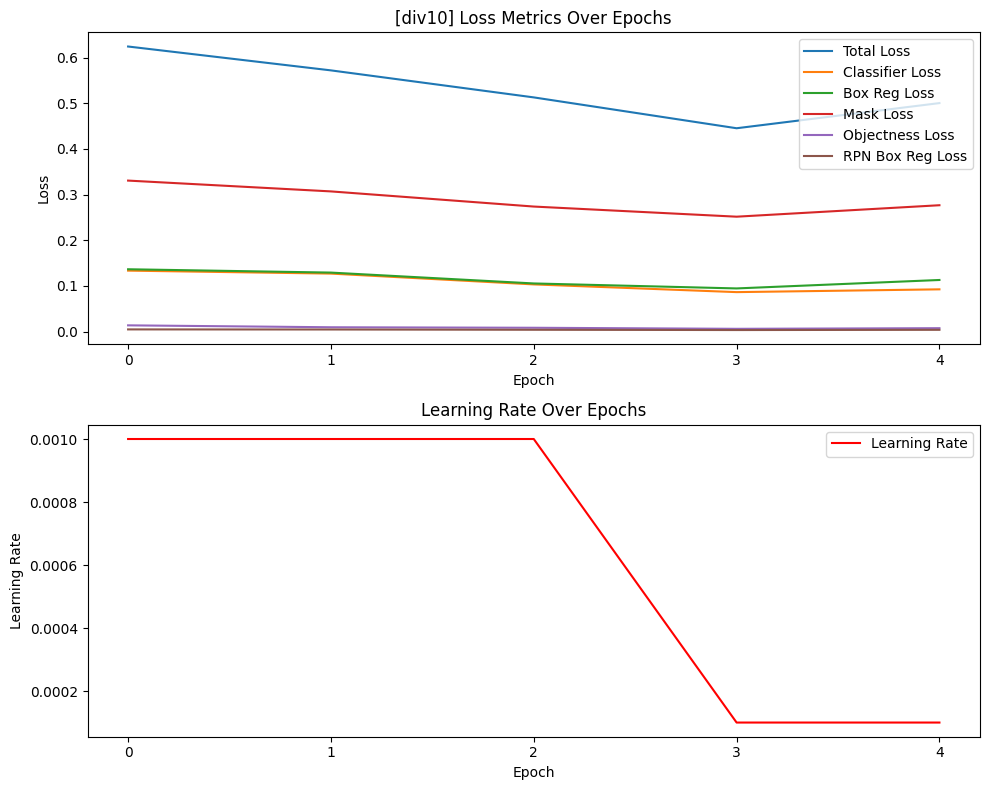

In [49]:
import matplotlib.pyplot as plt
from collections import defaultdict

# 주어진 데이터
data = {0: [{'lr': 0.001, 'loss': 0.6245, 'loss_classifier': 0.1334, 'loss_box_reg': 0.1364, 'loss_mask': 0.3307, 'loss_objectness': 0.0135, 'loss_rpn_box_reg': 0.0046, 'time': 0.5293, 'data_time': 0.018, 'max_mem': 5991}],
        1: [{'lr': 0.001, 'loss': 0.5722, 'loss_classifier': 0.1269, 'loss_box_reg': 0.1291, 'loss_mask': 0.307, 'loss_objectness': 0.0093, 'loss_rpn_box_reg': 0.0044, 'time': 0.5281, 'data_time': 0.0156, 'max_mem': 5992}],
        2: [{'lr': 0.001, 'loss': 0.513, 'loss_classifier': 0.1032, 'loss_box_reg': 0.1053, 'loss_mask': 0.2738, 'loss_objectness': 0.0082, 'loss_rpn_box_reg': 0.0038, 'time': 0.5267, 'data_time': 0.0154, 'max_mem': 5992}],
        3: [{'lr': 0.0001, 'loss': 0.4454, 'loss_classifier': 0.0863, 'loss_box_reg': 0.0944, 'loss_mask': 0.2516, 'loss_objectness': 0.0059, 'loss_rpn_box_reg': 0.0032, 'time': 0.5334, 'data_time': 0.0192, 'max_mem': 5992}],
        4: [{'lr': 0.0001, 'loss': 0.5005, 'loss_classifier': 0.0924, 'loss_box_reg': 0.1129, 'loss_mask': 0.2767, 'loss_objectness': 0.0073, 'loss_rpn_box_reg': 0.0037, 'time': 0.5358, 'data_time': 0.0201, 'max_mem': 5992}]}

# 데이터를 처리하기 쉬운 형태로 변환
epochs = list(data.keys())
losses = [entry[0]['loss'] for entry in data.values()]
loss_classifier = [entry[0]['loss_classifier'] for entry in data.values()]
loss_box_reg = [entry[0]['loss_box_reg'] for entry in data.values()]
loss_mask = [entry[0]['loss_mask'] for entry in data.values()]
loss_objectness = [entry[0]['loss_objectness'] for entry in data.values()]
loss_rpn_box_reg = [entry[0]['loss_rpn_box_reg'] for entry in data.values()]
lr = [entry[0]['lr'] for entry in data.values()]

# 시각화
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs, losses, label='Total Loss')
plt.plot(epochs, loss_classifier, label='Classifier Loss')
plt.plot(epochs, loss_box_reg, label='Box Reg Loss')
plt.plot(epochs, loss_mask, label='Mask Loss')
plt.plot(epochs, loss_objectness, label='Objectness Loss')
plt.plot(epochs, loss_rpn_box_reg, label='RPN Box Reg Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('[div10] Loss Metrics Over Epochs')
plt.xticks(epochs)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, lr, label='Learning Rate', color='r')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Over Epochs')
plt.xticks(epochs)
plt.legend()

plt.tight_layout()
plt.show()


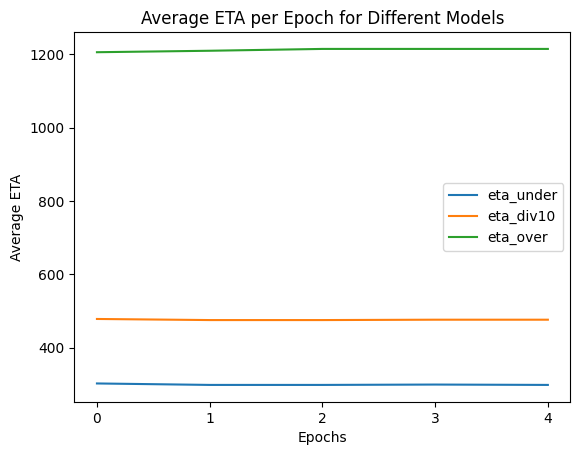

In [20]:
import matplotlib.pyplot as plt

# 에폭별 평균 ETA 값
epochs = [0, 1, 2, 3, 4]
eta_under = [302, 298, 298, 299, 298]  # 첫 번째 모델의 에폭별 평균 ETA
eta_div10 = [478, 475, 475, 476, 476]  # 두 번째 모델의 에폭별 평균 ETA
eta_over = [1206, 1210, 1215, 1215, 1215]  # 세 번째 모델의 에폭별 평균 ETA

plt.plot(epochs, eta_under, label='eta_under')
plt.plot(epochs, eta_div10, label='eta_div10')
plt.plot(epochs, eta_over, label='eta_over')

plt.xlabel('Epochs')
plt.ylabel('Average ETA')
plt.title('Average ETA per Epoch for Different Models')
plt.xticks(epochs)
plt.legend()
plt.show()


In [32]:
import re
import pandas as pd

# 여러 줄의 로그 텍스트
log_text = '''
Epoch: [0] [ 0/2204] eta: 7:57:40 lr: 0.000002 loss: 3.1583 (3.1583) loss_classifier: 1.6937 (1.6937) loss_box_reg: 0.1297 (0.1297) loss_mask: 1.3000 (1.3000) loss_objectness: 0.0297 (0.0297) loss_rpn_box_reg: 0.0052 (0.0052) time: 13.0040 data: 4.6650 max mem: 5813 Epoch: [0] [ 100/2204] eta: 0:22:56 lr: 0.000102 loss: 0.9335 (1.8883) loss_classifier: 0.1581 (0.5588) loss_box_reg: 0.1092 (0.0995) loss_mask: 0.6121 (1.1444) loss_objectness: 0.0559 (0.0790) loss_rpn_box_reg: 0.0051 (0.0067) time: 0.5428 data: 0.0359 max mem: 5989 Epoch: [0] [ 200/2204] eta: 0:19:54 lr: 0.000202 loss: 0.7601 (1.3598) loss_classifier: 0.1651 (0.3673) loss_box_reg: 0.1259 (0.1128) loss_mask: 0.4190 (0.8132) loss_objectness: 0.0286 (0.0604) loss_rpn_box_reg: 0.0043 (0.0061) time: 0.5337 data: 0.0218 max mem: 5989 Epoch: [0] [ 300/2204] eta: 0:18:16 lr: 0.000302 loss: 0.7396 (1.1575) loss_classifier: 0.1729 (0.3025) loss_box_reg: 0.1406 (0.1180) loss_mask: 0.3984 (0.6803) loss_objectness: 0.0264 (0.0509) loss_rpn_box_reg: 0.0050 (0.0058) time: 0.5352 data: 0.0217 max mem: 5989 Epoch: [0] [ 400/2204] eta: 0:17:02 lr: 0.000402 loss: 0.7336 (1.0546) loss_classifier: 0.1803 (0.2712) loss_box_reg: 0.1546 (0.1251) loss_mask: 0.3806 (0.6083) loss_objectness: 0.0205 (0.0444) loss_rpn_box_reg: 0.0043 (0.0056) time: 0.5394 data: 0.0237 max mem: 5989 Epoch: [0] [ 500/2204] eta: 0:15:57 lr: 0.000501 loss: 0.7132 (0.9859) loss_classifier: 0.1625 (0.2501) loss_box_reg: 0.1379 (0.1292) loss_mask: 0.3697 (0.5614) loss_objectness: 0.0189 (0.0397) loss_rpn_box_reg: 0.0053 (0.0055) time: 0.5481 data: 0.0343 max mem: 5989 Epoch: [0] [ 600/2204] eta: 0:14:54 lr: 0.000601 loss: 0.6837 (0.9358) loss_classifier: 0.1562 (0.2348) loss_box_reg: 0.1487 (0.1323) loss_mask: 0.3446 (0.5270) loss_objectness: 0.0152 (0.0364) loss_rpn_box_reg: 0.0048 (0.0054) time: 0.5360 data: 0.0207 max mem: 5989 Epoch: [0] [ 700/2204] eta: 0:13:55 lr: 0.000701 loss: 0.6104 (0.8934) loss_classifier: 0.1263 (0.2211) loss_box_reg: 0.1316 (0.1328) loss_mask: 0.3263 (0.5005) loss_objectness: 0.0126 (0.0336) loss_rpn_box_reg: 0.0041 (0.0053) time: 0.5377 data: 0.0214 max mem: 5989 Epoch: [0] [ 800/2204] eta: 0:12:57 lr: 0.000801 loss: 0.5981 (0.8587) loss_classifier: 0.1337 (0.2104) loss_box_reg: 0.1202 (0.1326) loss_mask: 0.3361 (0.4792) loss_objectness: 0.0123 (0.0313) loss_rpn_box_reg: 0.0035 (0.0052) time: 0.5510 data: 0.0370 max mem: 5989 Epoch: [0] [ 900/2204] eta: 0:12:00 lr: 0.000901 loss: 0.5643 (0.8287) loss_classifier: 0.1137 (0.2011) loss_box_reg: 0.1248 (0.1317) loss_mask: 0.3034 (0.4613) loss_objectness: 0.0133 (0.0294) loss_rpn_box_reg: 0.0043 (0.0051) time: 0.5396 data: 0.0230 max mem: 5990 Epoch: [0] [1000/2204] eta: 0:11:03 lr: 0.001000 loss: 0.5996 (0.8047) loss_classifier: 0.1327 (0.1944) loss_box_reg: 0.1192 (0.1310) loss_mask: 0.3052 (0.4462) loss_objectness: 0.0140 (0.0281) loss_rpn_box_reg: 0.0045 (0.0050) time: 0.5393 data: 0.0219 max mem: 5990 Epoch: [0] [1100/2204] eta: 0:10:07 lr: 0.001000 loss: 0.5385 (0.7829) loss_classifier: 0.1110 (0.1878) loss_box_reg: 0.1172 (0.1301) loss_mask: 0.2909 (0.4335) loss_objectness: 0.0091 (0.0266) loss_rpn_box_reg: 0.0035 (0.0049) time: 0.5376 data: 0.0196 max mem: 5990 Epoch: [0] [1200/2204] eta: 0:09:12 lr: 0.001000 loss: 0.5455 (0.7637) loss_classifier: 0.1218 (0.1824) loss_box_reg: 0.1150 (0.1289) loss_mask: 0.2866 (0.4219) loss_objectness: 0.0104 (0.0256) loss_rpn_box_reg: 0.0032 (0.0049) time: 0.5537 data: 0.0343 max mem: 5990 Epoch: [0] [1300/2204] eta: 0:08:16 lr: 0.001000 loss: 0.4989 (0.7468) loss_classifier: 0.1092 (0.1776) loss_box_reg: 0.1067 (0.1280) loss_mask: 0.2694 (0.4119) loss_objectness: 0.0116 (0.0246) loss_rpn_box_reg: 0.0036 (0.0048) time: 0.5404 data: 0.0213 max mem: 5990 Epoch: [0] [1400/2204] eta: 0:07:21 lr: 0.001000 loss: 0.5322 (0.7325) loss_classifier: 0.1215 (0.1735) loss_box_reg: 0.1152 (0.1272) loss_mask: 0.2881 (0.4033) loss_objectness: 0.0102 (0.0237) loss_rpn_box_reg: 0.0032 (0.0047) time: 0.5418 data: 0.0208 max mem: 5990 Epoch: [0] [1500/2204] eta: 0:06:26 lr: 0.001000 loss: 0.5176 (0.7192) loss_classifier: 0.1069 (0.1696) loss_box_reg: 0.1090 (0.1265) loss_mask: 0.2669 (0.3955) loss_objectness: 0.0085 (0.0228) loss_rpn_box_reg: 0.0037 (0.0047) time: 0.5398 data: 0.0200 max mem: 5990 Epoch: [0] [1600/2204] eta: 0:05:31 lr: 0.001000 loss: 0.5231 (0.7068) loss_classifier: 0.1116 (0.1660) loss_box_reg: 0.1128 (0.1256) loss_mask: 0.2766 (0.3883) loss_objectness: 0.0128 (0.0222) loss_rpn_box_reg: 0.0037 (0.0046) time: 0.5549 data: 0.0356 max mem: 5990 Epoch: [0] [1700/2204] eta: 0:04:36 lr: 0.001000 loss: 0.5021 (0.6949) loss_classifier: 0.1111 (0.1626) loss_box_reg: 0.1019 (0.1246) loss_mask: 0.2751 (0.3816) loss_objectness: 0.0082 (0.0215) loss_rpn_box_reg: 0.0033 (0.0046) time: 0.5409 data: 0.0222 max mem: 5990 Epoch: [0] [1800/2204] eta: 0:03:41 lr: 0.001000 loss: 0.4873 (0.6843) loss_classifier: 0.1005 (0.1596) loss_box_reg: 0.0961 (0.1238) loss_mask: 0.2802 (0.3756) loss_objectness: 0.0104 (0.0209) loss_rpn_box_reg: 0.0027 (0.0045) time: 0.5407 data: 0.0228 max mem: 5990 Epoch: [0] [1900/2204] eta: 0:02:46 lr: 0.001000 loss: 0.4890 (0.6742) loss_classifier: 0.0970 (0.1568) loss_box_reg: 0.1082 (0.1229) loss_mask: 0.2776 (0.3698) loss_objectness: 0.0079 (0.0203) loss_rpn_box_reg: 0.0031 (0.0045) time: 0.5415 data: 0.0213 max mem: 5990 Epoch: [0] [2000/2204] eta: 0:01:51 lr: 0.001000 loss: 0.4935 (0.6647) loss_classifier: 0.0953 (0.1541) loss_box_reg: 0.1045 (0.1220) loss_mask: 0.2714 (0.3644) loss_objectness: 0.0069 (0.0197) loss_rpn_box_reg: 0.0031 (0.0044) time: 0.5538 data: 0.0336 max mem: 5990 Epoch: [0] [2100/2204] eta: 0:00:56 lr: 0.001000 loss: 0.5010 (0.6566) loss_classifier: 0.1096 (0.1519) loss_box_reg: 0.1010 (0.1213) loss_mask: 0.2669 (0.3597) loss_objectness: 0.0086 (0.0193) loss_rpn_box_reg: 0.0028 (0.0044) time: 0.5406 data: 0.0220 max mem: 5990 Epoch: [0] [2200/2204] eta: 0:00:02 lr: 0.001000 loss: 0.4909 (0.6485) loss_classifier: 0.0943 (0.1496) loss_box_reg: 0.1090 (0.1206) loss_mask: 0.2660 (0.3552) loss_objectness: 0.0081 (0.0188) loss_rpn_box_reg: 0.0028 (0.0043) time: 0.5386 data: 0.0187 max mem: 5990 Epoch: [0] [2203/2204] eta: 0:00:00 lr: 0.001000 loss: 0.4911 (0.6482) loss_classifier: 0.0922 (0.1495) loss_box_reg: 0.1073 (0.1206) loss_mask: 0.2660 (0.3551) loss_objectness: 0.0074 (0.0187) loss_rpn_box_reg: 0.0032 (0.0043) time: 0.5248 data: 0.0173 max mem: 5990

Epoch: [1] [ 0/2204] eta: 3:32:48 lr: 0.001000 loss: 0.4311 (0.4311) loss_classifier: 0.0780 (0.0780) loss_box_reg: 0.1021 (0.1021) loss_mask: 0.2396 (0.2396) loss_objectness: 0.0077 (0.0077) loss_rpn_box_reg: 0.0038 (0.0038) time: 5.7934 data: 5.1978 max mem: 5990 Epoch: [1] [ 100/2204] eta: 0:20:55 lr: 0.001000 loss: 0.4494 (0.4397) loss_classifier: 0.0909 (0.0895) loss_box_reg: 0.0924 (0.0954) loss_mask: 0.2449 (0.2445) loss_objectness: 0.0068 (0.0072) loss_rpn_box_reg: 0.0026 (0.0031) time: 0.5421 data: 0.0206 max mem: 5990 Epoch: [1] [ 200/2204] eta: 0:19:03 lr: 0.001000 loss: 0.4458 (0.4487) loss_classifier: 0.0923 (0.0920) loss_box_reg: 0.0980 (0.0979) loss_mask: 0.2476 (0.2482) loss_objectness: 0.0059 (0.0074) loss_rpn_box_reg: 0.0026 (0.0032) time: 0.5428 data: 0.0213 max mem: 5990 Epoch: [1] [ 300/2204] eta: 0:17:51 lr: 0.001000 loss: 0.4337 (0.4527) loss_classifier: 0.0935 (0.0934) loss_box_reg: 0.0947 (0.0991) loss_mask: 0.2465 (0.2493) loss_objectness: 0.0053 (0.0076) loss_rpn_box_reg: 0.0025 (0.0033) time: 0.5430 data: 0.0223 max mem: 5990 Epoch: [1] [ 400/2204] eta: 0:16:49 lr: 0.001000 loss: 0.4210 (0.4493) loss_classifier: 0.0789 (0.0929) loss_box_reg: 0.0923 (0.0991) loss_mask: 0.2345 (0.2465) loss_objectness: 0.0057 (0.0076) loss_rpn_box_reg: 0.0026 (0.0033) time: 0.5571 data: 0.0337 max mem: 5990 Epoch: [1] [ 500/2204] eta: 0:15:48 lr: 0.001000 loss: 0.3901 (0.4473) loss_classifier: 0.0833 (0.0923) loss_box_reg: 0.0901 (0.0987) loss_mask: 0.2195 (0.2454) loss_objectness: 0.0043 (0.0076) loss_rpn_box_reg: 0.0024 (0.0032) time: 0.5422 data: 0.0208 max mem: 5990 Epoch: [1] [ 600/2204] eta: 0:14:50 lr: 0.001000 loss: 0.4450 (0.4448) loss_classifier: 0.0891 (0.0916) loss_box_reg: 0.0920 (0.0982) loss_mask: 0.2433 (0.2441) loss_objectness: 0.0072 (0.0076) loss_rpn_box_reg: 0.0026 (0.0032) time: 0.5406 data: 0.0209 max mem: 5990 Epoch: [1] [ 700/2204] eta: 0:13:52 lr: 0.001000 loss: 0.4469 (0.4437) loss_classifier: 0.0925 (0.0912) loss_box_reg: 0.0925 (0.0979) loss_mask: 0.2438 (0.2437) loss_objectness: 0.0056 (0.0076) loss_rpn_box_reg: 0.0028 (0.0032) time: 0.5401 data: 0.0208 max mem: 5990 Epoch: [1] [ 800/2204] eta: 0:12:56 lr: 0.001000 loss: 0.4242 (0.4424) loss_classifier: 0.0886 (0.0912) loss_box_reg: 0.0872 (0.0975) loss_mask: 0.2313 (0.2429) loss_objectness: 0.0059 (0.0076) loss_rpn_box_reg: 0.0034 (0.0032) time: 0.5570 data: 0.0362 max mem: 5990 Epoch: [1] [ 900/2204] eta: 0:11:59 lr: 0.001000 loss: 0.4426 (0.4394) loss_classifier: 0.0911 (0.0905) loss_box_reg: 0.0939 (0.0967) loss_mask: 0.2396 (0.2415) loss_objectness: 0.0061 (0.0075) loss_rpn_box_reg: 0.0029 (0.0031) time: 0.5415 data: 0.0211 max mem: 5990 Epoch: [1] [1000/2204] eta: 0:11:03 lr: 0.001000 loss: 0.3890 (0.4364) loss_classifier: 0.0739 (0.0897) loss_box_reg: 0.0813 (0.0960) loss_mask: 0.2189 (0.2401) loss_objectness: 0.0051 (0.0074) loss_rpn_box_reg: 0.0023 (0.0031) time: 0.5404 data: 0.0216 max mem: 5990 Epoch: [1] [1100/2204] eta: 0:10:07 lr: 0.001000 loss: 0.3998 (0.4339) loss_classifier: 0.0833 (0.0891) loss_box_reg: 0.0911 (0.0956) loss_mask: 0.2151 (0.2388) loss_objectness: 0.0055 (0.0074) loss_rpn_box_reg: 0.0024 (0.0031) time: 0.5439 data: 0.0217 max mem: 5991 Epoch: [1] [1200/2204] eta: 0:09:12 lr: 0.001000 loss: 0.4238 (0.4321) loss_classifier: 0.0918 (0.0887) loss_box_reg: 0.0954 (0.0954) loss_mask: 0.2136 (0.2378) loss_objectness: 0.0066 (0.0073) loss_rpn_box_reg: 0.0022 (0.0031) time: 0.5548 data: 0.0345 max mem: 5991 Epoch: [1] [1300/2204] eta: 0:08:17 lr: 0.001000 loss: 0.4127 (0.4290) loss_classifier: 0.0752 (0.0876) loss_box_reg: 0.0897 (0.0946) loss_mask: 0.2294 (0.2365) loss_objectness: 0.0056 (0.0072) loss_rpn_box_reg: 0.0031 (0.0031) time: 0.5421 data: 0.0224 max mem: 5991 Epoch: [1] [1400/2204] eta: 0:07:22 lr: 0.001000 loss: 0.3357 (0.4267) loss_classifier: 0.0642 (0.0870) loss_box_reg: 0.0768 (0.0942) loss_mask: 0.1903 (0.2353) loss_objectness: 0.0034 (0.0071) loss_rpn_box_reg: 0.0019 (0.0031) time: 0.5470 data: 0.0236 max mem: 5991 Epoch: [1] [1500/2204] eta: 0:06:27 lr: 0.001000 loss: 0.3864 (0.4240) loss_classifier: 0.0776 (0.0862) loss_box_reg: 0.0900 (0.0936) loss_mask: 0.2139 (0.2340) loss_objectness: 0.0066 (0.0071) loss_rpn_box_reg: 0.0033 (0.0031) time: 0.5585 data: 0.0332 max mem: 5991 Epoch: [1] [1600/2204] eta: 0:05:32 lr: 0.001000 loss: 0.3757 (0.4218) loss_classifier: 0.0779 (0.0857) loss_box_reg: 0.0893 (0.0932) loss_mask: 0.2130 (0.2328) loss_objectness: 0.0046 (0.0071) loss_rpn_box_reg: 0.0023 (0.0030) time: 0.5463 data: 0.0227 max mem: 5991 Epoch: [1] [1700/2204] eta: 0:04:37 lr: 0.001000 loss: 0.3588 (0.4188) loss_classifier: 0.0713 (0.0848) loss_box_reg: 0.0733 (0.0924) loss_mask: 0.2021 (0.2315) loss_objectness: 0.0069 (0.0070) loss_rpn_box_reg: 0.0022 (0.0030) time: 0.5459 data: 0.0223 max mem: 5991 Epoch: [1] [1800/2204] eta: 0:03:42 lr: 0.001000 loss: 0.3484 (0.4167) loss_classifier: 0.0695 (0.0842) loss_box_reg: 0.0758 (0.0920) loss_mask: 0.1996 (0.2305) loss_objectness: 0.0049 (0.0069) loss_rpn_box_reg: 0.0026 (0.0030) time: 0.5450 data: 0.0233 max mem: 5991 Epoch: [1] [1900/2204] eta: 0:02:47 lr: 0.001000 loss: 0.3137 (0.4141) loss_classifier: 0.0675 (0.0835) loss_box_reg: 0.0697 (0.0915) loss_mask: 0.1765 (0.2294) loss_objectness: 0.0041 (0.0068) loss_rpn_box_reg: 0.0018 (0.0030) time: 0.5550 data: 0.0328 max mem: 5991 Epoch: [1] [2000/2204] eta: 0:01:52 lr: 0.001000 loss: 0.3704 (0.4124) loss_classifier: 0.0774 (0.0831) loss_box_reg: 0.0836 (0.0911) loss_mask: 0.2072 (0.2284) loss_objectness: 0.0063 (0.0068) loss_rpn_box_reg: 0.0025 (0.0030) time: 0.5473 data: 0.0245 max mem: 5991 Epoch: [1] [2100/2204] eta: 0:00:57 lr: 0.001000 loss: 0.3673 (0.4106) loss_classifier: 0.0666 (0.0827) loss_box_reg: 0.0773 (0.0907) loss_mask: 0.2024 (0.2275) loss_objectness: 0.0045 (0.0068) loss_rpn_box_reg: 0.0023 (0.0029) time: 0.5431 data: 0.0203 max mem: 5991 Epoch: [1] [2200/2204] eta: 0:00:02 lr: 0.001000 loss: 0.3733 (0.4088) loss_classifier: 0.0721 (0.0823) loss_box_reg: 0.0850 (0.0903) loss_mask: 0.2128 (0.2265) loss_objectness: 0.0042 (0.0067) loss_rpn_box_reg: 0.0025 (0.0029) time: 0.5425 data: 0.0212 max mem: 5991 Epoch: [1] [2203/2204] eta: 0:00:00 lr: 0.001000 loss: 0.3733 (0.4087) loss_classifier: 0.0721 (0.0823) loss_box_reg: 0.0845 (0.0903) loss_mask: 0.2130 (0.2265) loss_objectness: 0.0049 (0.0067) loss_rpn_box_reg: 0.0025 (0.0029) time: 0.5319 data: 0.0236 max mem: 5991 Epoch: [1] Total time: 0:20:10 (0.5494 s / it)

Epoch: [2] [ 0/2204] eta: 3:26:17 lr: 0.001000 loss: 0.3820 (0.3820) loss_classifier: 0.0842 (0.0842) loss_box_reg: 0.0856 (0.0856) loss_mask: 0.2084 (0.2084) loss_objectness: 0.0027 (0.0027) loss_rpn_box_reg: 0.0012 (0.0012) time: 5.6159 data: 5.0600 max mem: 5991 Epoch: [2] [ 100/2204] eta: 0:20:57 lr: 0.001000 loss: 0.3354 (0.3370) loss_classifier: 0.0552 (0.0638) loss_box_reg: 0.0734 (0.0741) loss_mask: 0.1964 (0.1922) loss_objectness: 0.0031 (0.0048) loss_rpn_box_reg: 0.0022 (0.0022) time: 0.5521 data: 0.0289 max mem: 5991 Epoch: [2] [ 200/2204] eta: 0:19:11 lr: 0.001000 loss: 0.3133 (0.3342) loss_classifier: 0.0613 (0.0636) loss_box_reg: 0.0700 (0.0741) loss_mask: 0.1803 (0.1891) loss_objectness: 0.0031 (0.0049) loss_rpn_box_reg: 0.0019 (0.0024) time: 0.5527 data: 0.0305 max mem: 5991 Epoch: [2] [ 300/2204] eta: 0:17:58 lr: 0.001000 loss: 0.3464 (0.3328) loss_classifier: 0.0608 (0.0634) loss_box_reg: 0.0764 (0.0741) loss_mask: 0.1866 (0.1883) loss_objectness: 0.0039 (0.0046) loss_rpn_box_reg: 0.0028 (0.0024) time: 0.5483 data: 0.0228 max mem: 5991 Epoch: [2] [ 400/2204] eta: 0:16:53 lr: 0.001000 loss: 0.3253 (0.3301) loss_classifier: 0.0568 (0.0630) loss_box_reg: 0.0710 (0.0733) loss_mask: 0.1754 (0.1869) loss_objectness: 0.0046 (0.0045) loss_rpn_box_reg: 0.0023 (0.0024) time: 0.5472 data: 0.0236 max mem: 5991 Epoch: [2] [ 500/2204] eta: 0:15:53 lr: 0.001000 loss: 0.3046 (0.3314) loss_classifier: 0.0553 (0.0632) loss_box_reg: 0.0767 (0.0738) loss_mask: 0.1802 (0.1874) loss_objectness: 0.0028 (0.0045) loss_rpn_box_reg: 0.0024 (0.0024) time: 0.5527 data: 0.0283 max mem: 5991 Epoch: [2] [ 600/2204] eta: 0:14:55 lr: 0.001000 loss: 0.3064 (0.3317) loss_classifier: 0.0591 (0.0630) loss_box_reg: 0.0654 (0.0740) loss_mask: 0.1802 (0.1878) loss_objectness: 0.0034 (0.0045) loss_rpn_box_reg: 0.0024 (0.0024) time: 0.5539 data: 0.0321 max mem: 5991 Epoch: [2] [ 700/2204] eta: 0:13:57 lr: 0.001000 loss: 0.3465 (0.3319) loss_classifier: 0.0594 (0.0629) loss_box_reg: 0.0739 (0.0739) loss_mask: 0.2006 (0.1881) loss_objectness: 0.0029 (0.0045) loss_rpn_box_reg: 0.0022 (0.0024) time: 0.5463 data: 0.0235 max mem: 5991 Epoch: [2] [ 800/2204] eta: 0:13:00 lr: 0.001000 loss: 0.3171 (0.3295) loss_classifier: 0.0541 (0.0622) loss_box_reg: 0.0718 (0.0735) loss_mask: 0.1840 (0.1870) loss_objectness: 0.0026 (0.0045) loss_rpn_box_reg: 0.0019 (0.0024) time: 0.5463 data: 0.0216 max mem: 5991 Epoch: [2] [ 900/2204] eta: 0:12:03 lr: 0.001000 loss: 0.3378 (0.3282) loss_classifier: 0.0614 (0.0621) loss_box_reg: 0.0769 (0.0731) loss_mask: 0.1925 (0.1862) loss_objectness: 0.0047 (0.0045) loss_rpn_box_reg: 0.0024 (0.0024) time: 0.5596 data: 0.0370 max mem: 5991 Epoch: [2] [1000/2204] eta: 0:11:07 lr: 0.001000 loss: 0.2829 (0.3279) loss_classifier: 0.0542 (0.0623) loss_box_reg: 0.0644 (0.0731) loss_mask: 0.1717 (0.1857) loss_objectness: 0.0025 (0.0045) loss_rpn_box_reg: 0.0019 (0.0024) time: 0.5417 data: 0.0195 max mem: 5991 Epoch: [2] [1100/2204] eta: 0:10:11 lr: 0.001000 loss: 0.3263 (0.3268) loss_classifier: 0.0704 (0.0621) loss_box_reg: 0.0681 (0.0728) loss_mask: 0.1903 (0.1851) loss_objectness: 0.0023 (0.0044) loss_rpn_box_reg: 0.0020 (0.0024) time: 0.5445 data: 0.0205 max mem: 5991 Epoch: [2] [1200/2204] eta: 0:09:15 lr: 0.001000 loss: 0.3074 (0.3253) loss_classifier: 0.0552 (0.0619) loss_box_reg: 0.0710 (0.0725) loss_mask: 0.1790 (0.1842) loss_objectness: 0.0042 (0.0044) loss_rpn_box_reg: 0.0020 (0.0023) time: 0.5472 data: 0.0232 max mem: 5991 Epoch: [2] [1300/2204] eta: 0:08:20 lr: 0.001000 loss: 0.2848 (0.3236) loss_classifier: 0.0553 (0.0615) loss_box_reg: 0.0629 (0.0721) loss_mask: 0.1616 (0.1833) loss_objectness: 0.0022 (0.0044) loss_rpn_box_reg: 0.0023 (0.0023) time: 0.5601 data: 0.0362 max mem: 5991 Epoch: [2] [1400/2204] eta: 0:07:24 lr: 0.001000 loss: 0.3128 (0.3226) loss_classifier: 0.0580 (0.0613) loss_box_reg: 0.0634 (0.0718) loss_mask: 0.1721 (0.1828) loss_objectness: 0.0026 (0.0044) loss_rpn_box_reg: 0.0017 (0.0023) time: 0.5451 data: 0.0224 max mem: 5991 Epoch: [2] [1500/2204] eta: 0:06:28 lr: 0.001000 loss: 0.2842 (0.3216) loss_classifier: 0.0482 (0.0610) loss_box_reg: 0.0597 (0.0716) loss_mask: 0.1598 (0.1822) loss_objectness: 0.0018 (0.0043) loss_rpn_box_reg: 0.0021 (0.0023) time: 0.5449 data: 0.0210 max mem: 5991 Epoch: [2] [1600/2204] eta: 0:05:33 lr: 0.001000 loss: 0.3271 (0.3205) loss_classifier: 0.0515 (0.0607) loss_box_reg: 0.0713 (0.0714) loss_mask: 0.1835 (0.1818) loss_objectness: 0.0037 (0.0043) loss_rpn_box_reg: 0.0020 (0.0023) time: 0.5474 data: 0.0222 max mem: 5991 Epoch: [2] [1700/2204] eta: 0:04:38 lr: 0.001000 loss: 0.2593 (0.3199) loss_classifier: 0.0493 (0.0606) loss_box_reg: 0.0547 (0.0713) loss_mask: 0.1542 (0.1814) loss_objectness: 0.0029 (0.0043) loss_rpn_box_reg: 0.0018 (0.0023) time: 0.5629 data: 0.0372 max mem: 5991 Epoch: [2] [1800/2204] eta: 0:03:43 lr: 0.001000 loss: 0.2882 (0.3186) loss_classifier: 0.0568 (0.0603) loss_box_reg: 0.0624 (0.0710) loss_mask: 0.1708 (0.1808) loss_objectness: 0.0018 (0.0042) loss_rpn_box_reg: 0.0015 (0.0023) time: 0.5483 data: 0.0233 max mem: 5991 Epoch: [2] [1900/2204] eta: 0:02:47 lr: 0.001000 loss: 0.2637 (0.3166) loss_classifier: 0.0479 (0.0599) loss_box_reg: 0.0557 (0.0704) loss_mask: 0.1557 (0.1798) loss_objectness: 0.0024 (0.0042) loss_rpn_box_reg: 0.0017 (0.0023) time: 0.5435 data: 0.0201 max mem: 5991 Epoch: [2] [2000/2204] eta: 0:01:52 lr: 0.001000 loss: 0.2781 (0.3153) loss_classifier: 0.0526 (0.0596) loss_box_reg: 0.0599 (0.0702) loss_mask: 0.1636 (0.1790) loss_objectness: 0.0029 (0.0042) loss_rpn_box_reg: 0.0020 (0.0023) time: 0.5491 data: 0.0234 max mem: 5991 Epoch: [2] [2100/2204] eta: 0:00:57 lr: 0.001000 loss: 0.2510 (0.3143) loss_classifier: 0.0384 (0.0594) loss_box_reg: 0.0538 (0.0700) loss_mask: 0.1483 (0.1785) loss_objectness: 0.0022 (0.0042) loss_rpn_box_reg: 0.0014 (0.0023) time: 0.5635 data: 0.0393 max mem: 5991 Epoch: [2] [2200/2204] eta: 0:00:02 lr: 0.001000 loss: 0.3134 (0.3132) loss_classifier: 0.0558 (0.0591) loss_box_reg: 0.0685 (0.0697) loss_mask: 0.1771 (0.1781) loss_objectness: 0.0024 (0.0041) loss_rpn_box_reg: 0.0020 (0.0023) time: 0.5374 data: 0.0159 max mem: 5991 Epoch: [2] [2203/2204] eta: 0:00:00 lr: 0.001000 loss: 0.3134 (0.3132) loss_classifier: 0.0558 (0.0591) loss_box_reg: 0.0685 (0.0697) loss_mask: 0.1814 (0.1781) loss_objectness: 0.0024 (0.0041) loss_rpn_box_reg: 0.0018 (0.0022) time: 0.5252 data: 0.0161 max mem: 5991 Epoch: [2] Total time: 0:20:15 (0.5517 s / it)

Epoch: [3] [ 0/2204] eta: 2:56:12 lr: 0.000100 loss: 0.2627 (0.2627) loss_classifier: 0.0454 (0.0454) loss_box_reg: 0.0609 (0.0609) loss_mask: 0.1506 (0.1506) loss_objectness: 0.0051 (0.0051) loss_rpn_box_reg: 0.0008 (0.0008) time: 4.7971 data: 4.0110 max mem: 5991 Epoch: [3] [ 100/2204] eta: 0:20:58 lr: 0.000100 loss: 0.2331 (0.2520) loss_classifier: 0.0418 (0.0454) loss_box_reg: 0.0542 (0.0555) loss_mask: 0.1446 (0.1467) loss_objectness: 0.0023 (0.0027) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5535 data: 0.0307 max mem: 5991 Epoch: [3] [ 200/2204] eta: 0:19:11 lr: 0.000100 loss: 0.2382 (0.2483) loss_classifier: 0.0403 (0.0443) loss_box_reg: 0.0505 (0.0550) loss_mask: 0.1402 (0.1448) loss_objectness: 0.0014 (0.0025) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5482 data: 0.0243 max mem: 5991 Epoch: [3] [ 300/2204] eta: 0:17:58 lr: 0.000100 loss: 0.2218 (0.2430) loss_classifier: 0.0366 (0.0431) loss_box_reg: 0.0485 (0.0537) loss_mask: 0.1327 (0.1422) loss_objectness: 0.0017 (0.0023) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5484 data: 0.0218 max mem: 5991 Epoch: [3] [ 400/2204] eta: 0:16:55 lr: 0.000100 loss: 0.2194 (0.2402) loss_classifier: 0.0361 (0.0423) loss_box_reg: 0.0515 (0.0529) loss_mask: 0.1252 (0.1412) loss_objectness: 0.0019 (0.0022) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5494 data: 0.0240 max mem: 5991 Epoch: [3] [ 500/2204] eta: 0:15:55 lr: 0.000100 loss: 0.2410 (0.2400) loss_classifier: 0.0454 (0.0420) loss_box_reg: 0.0586 (0.0530) loss_mask: 0.1371 (0.1412) loss_objectness: 0.0012 (0.0022) loss_rpn_box_reg: 0.0015 (0.0017) time: 0.5561 data: 0.0294 max mem: 5991 Epoch: [3] [ 600/2204] eta: 0:14:56 lr: 0.000100 loss: 0.2067 (0.2388) loss_classifier: 0.0346 (0.0419) loss_box_reg: 0.0436 (0.0527) loss_mask: 0.1246 (0.1403) loss_objectness: 0.0008 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5518 data: 0.0263 max mem: 5991 Epoch: [3] [ 700/2204] eta: 0:13:58 lr: 0.000100 loss: 0.2220 (0.2377) loss_classifier: 0.0349 (0.0417) loss_box_reg: 0.0456 (0.0524) loss_mask: 0.1327 (0.1397) loss_objectness: 0.0014 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5476 data: 0.0223 max mem: 5991 Epoch: [3] [ 800/2204] eta: 0:13:01 lr: 0.000100 loss: 0.2021 (0.2360) loss_classifier: 0.0323 (0.0414) loss_box_reg: 0.0411 (0.0518) loss_mask: 0.1237 (0.1389) loss_objectness: 0.0017 (0.0022) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5481 data: 0.0226 max mem: 5991 Epoch: [3] [ 900/2204] eta: 0:12:05 lr: 0.000100 loss: 0.2080 (0.2355) loss_classifier: 0.0365 (0.0414) loss_box_reg: 0.0474 (0.0517) loss_mask: 0.1251 (0.1384) loss_objectness: 0.0016 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5572 data: 0.0330 max mem: 5991 Epoch: [3] [1000/2204] eta: 0:11:09 lr: 0.000100 loss: 0.2058 (0.2344) loss_classifier: 0.0318 (0.0413) loss_box_reg: 0.0453 (0.0515) loss_mask: 0.1179 (0.1378) loss_objectness: 0.0009 (0.0022) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5489 data: 0.0241 max mem: 5992 Epoch: [3] [1100/2204] eta: 0:10:13 lr: 0.000100 loss: 0.2171 (0.2336) loss_classifier: 0.0348 (0.0411) loss_box_reg: 0.0431 (0.0512) loss_mask: 0.1244 (0.1374) loss_objectness: 0.0012 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5455 data: 0.0209 max mem: 5992 Epoch: [3] [1200/2204] eta: 0:09:17 lr: 0.000100 loss: 0.2092 (0.2334) loss_classifier: 0.0355 (0.0411) loss_box_reg: 0.0430 (0.0511) loss_mask: 0.1300 (0.1373) loss_objectness: 0.0013 (0.0023) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5479 data: 0.0223 max mem: 5992 Epoch: [3] [1300/2204] eta: 0:08:21 lr: 0.000100 loss: 0.2267 (0.2325) loss_classifier: 0.0385 (0.0409) loss_box_reg: 0.0478 (0.0508) loss_mask: 0.1315 (0.1370) loss_objectness: 0.0009 (0.0022) loss_rpn_box_reg: 0.0015 (0.0017) time: 0.5598 data: 0.0336 max mem: 5992 Epoch: [3] [1400/2204] eta: 0:07:25 lr: 0.000100 loss: 0.2057 (0.2325) loss_classifier: 0.0363 (0.0409) loss_box_reg: 0.0434 (0.0508) loss_mask: 0.1224 (0.1369) loss_objectness: 0.0015 (0.0023) loss_rpn_box_reg: 0.0016 (0.0017) time: 0.5541 data: 0.0257 max mem: 5992 Epoch: [3] [1500/2204] eta: 0:06:30 lr: 0.000100 loss: 0.2119 (0.2321) loss_classifier: 0.0330 (0.0409) loss_box_reg: 0.0466 (0.0506) loss_mask: 0.1304 (0.1367) loss_objectness: 0.0019 (0.0023) loss_rpn_box_reg: 0.0017 (0.0017) time: 0.5470 data: 0.0206 max mem: 5992 Epoch: [3] [1600/2204] eta: 0:05:34 lr: 0.000100 loss: 0.1863 (0.2309) loss_classifier: 0.0353 (0.0406) loss_box_reg: 0.0364 (0.0502) loss_mask: 0.1111 (0.1362) loss_objectness: 0.0019 (0.0023) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5475 data: 0.0228 max mem: 5992 Epoch: [3] [1700/2204] eta: 0:04:39 lr: 0.000100 loss: 0.1913 (0.2301) loss_classifier: 0.0328 (0.0405) loss_box_reg: 0.0368 (0.0500) loss_mask: 0.1191 (0.1357) loss_objectness: 0.0015 (0.0023) loss_rpn_box_reg: 0.0011 (0.0017) time: 0.5558 data: 0.0316 max mem: 5992 Epoch: [3] [1800/2204] eta: 0:03:43 lr: 0.000100 loss: 0.1992 (0.2297) loss_classifier: 0.0371 (0.0404) loss_box_reg: 0.0417 (0.0499) loss_mask: 0.1233 (0.1355) loss_objectness: 0.0011 (0.0022) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5525 data: 0.0253 max mem: 5992 Epoch: [3] [1900/2204] eta: 0:02:48 lr: 0.000100 loss: 0.2187 (0.2292) loss_classifier: 0.0377 (0.0402) loss_box_reg: 0.0455 (0.0497) loss_mask: 0.1304 (0.1353) loss_objectness: 0.0016 (0.0022) loss_rpn_box_reg: 0.0015 (0.0017) time: 0.5478 data: 0.0225 max mem: 5992 Epoch: [3] [2000/2204] eta: 0:01:52 lr: 0.000100 loss: 0.1986 (0.2287) loss_classifier: 0.0320 (0.0402) loss_box_reg: 0.0404 (0.0495) loss_mask: 0.1230 (0.1351) loss_objectness: 0.0016 (0.0022) loss_rpn_box_reg: 0.0014 (0.0017) time: 0.5479 data: 0.0218 max mem: 5992 Epoch: [3] [2100/2204] eta: 0:00:57 lr: 0.000100 loss: 0.2400 (0.2284) loss_classifier: 0.0357 (0.0401) loss_box_reg: 0.0557 (0.0495) loss_mask: 0.1416 (0.1349) loss_objectness: 0.0015 (0.0022) loss_rpn_box_reg: 0.0014 (0.0017) time: 0.5605 data: 0.0349 max mem: 5992 Epoch: [3] [2200/2204] eta: 0:00:02 lr: 0.000100 loss: 0.2090 (0.2280) loss_classifier: 0.0359 (0.0400) loss_box_reg: 0.0478 (0.0494) loss_mask: 0.1248 (0.1347) loss_objectness: 0.0011 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5432 data: 0.0175 max mem: 5992 Epoch: [3] [2203/2204] eta: 0:00:00 lr: 0.000100 loss: 0.2162 (0.2280) loss_classifier: 0.0370 (0.0400) loss_box_reg: 0.0478 (0.0494) loss_mask: 0.1302 (0.1347) loss_objectness: 0.0012 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5306 data: 0.0176 max mem: 5992 Epoch: [3] Total time: 0:20:19 (0.5533 s / it)

Epoch: [4] [ 0/2204] eta: 3:34:23 lr: 0.000100 loss: 0.3144 (0.3144) loss_classifier: 0.0578 (0.0578) loss_box_reg: 0.0609 (0.0609) loss_mask: 0.1872 (0.1872) loss_objectness: 0.0058 (0.0058) loss_rpn_box_reg: 0.0027 (0.0027) time: 5.8364 data: 5.2942 max mem: 5992 Epoch: [4] [ 100/2204] eta: 0:21:09 lr: 0.000100 loss: 0.2164 (0.2102) loss_classifier: 0.0348 (0.0369) loss_box_reg: 0.0456 (0.0454) loss_mask: 0.1312 (0.1243) loss_objectness: 0.0009 (0.0020) loss_rpn_box_reg: 0.0014 (0.0015) time: 0.5610 data: 0.0353 max mem: 5992 Epoch: [4] [ 200/2204] eta: 0:19:16 lr: 0.000100 loss: 0.1899 (0.2093) loss_classifier: 0.0304 (0.0366) loss_box_reg: 0.0398 (0.0447) loss_mask: 0.1195 (0.1245) loss_objectness: 0.0017 (0.0021) loss_rpn_box_reg: 0.0013 (0.0015) time: 0.5492 data: 0.0225 max mem: 5992 Epoch: [4] [ 300/2204] eta: 0:18:01 lr: 0.000100 loss: 0.1960 (0.2089) loss_classifier: 0.0310 (0.0365) loss_box_reg: 0.0435 (0.0448) loss_mask: 0.1146 (0.1241) loss_objectness: 0.0009 (0.0019) loss_rpn_box_reg: 0.0015 (0.0015) time: 0.5461 data: 0.0201 max mem: 5992 Epoch: [4] [ 400/2204] eta: 0:16:57 lr: 0.000100 loss: 0.1917 (0.2083) loss_classifier: 0.0315 (0.0366) loss_box_reg: 0.0380 (0.0446) loss_mask: 0.1164 (0.1235) loss_objectness: 0.0007 (0.0019) loss_rpn_box_reg: 0.0013 (0.0015) time: 0.5504 data: 0.0227 max mem: 5992 Epoch: [4] [ 500/2204] eta: 0:15:57 lr: 0.000100 loss: 0.1863 (0.2102) loss_classifier: 0.0330 (0.0373) loss_box_reg: 0.0413 (0.0451) loss_mask: 0.1047 (0.1243) loss_objectness: 0.0012 (0.0020) loss_rpn_box_reg: 0.0014 (0.0015) time: 0.5589 data: 0.0341 max mem: 5992 Epoch: [4] [ 600/2204] eta: 0:14:58 lr: 0.000100 loss: 0.2056 (0.2106) loss_classifier: 0.0349 (0.0374) loss_box_reg: 0.0440 (0.0450) loss_mask: 0.1244 (0.1246) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0016 (0.0015) time: 0.5471 data: 0.0219 max mem: 5992 Epoch: [4] [ 700/2204] eta: 0:14:00 lr: 0.000100 loss: 0.2190 (0.2104) loss_classifier: 0.0381 (0.0372) loss_box_reg: 0.0430 (0.0448) loss_mask: 0.1281 (0.1248) loss_objectness: 0.0012 (0.0020) loss_rpn_box_reg: 0.0018 (0.0016) time: 0.5618 data: 0.0349 max mem: 5992 Epoch: [4] [ 800/2204] eta: 0:13:03 lr: 0.000100 loss: 0.2102 (0.2104) loss_classifier: 0.0335 (0.0371) loss_box_reg: 0.0425 (0.0449) loss_mask: 0.1218 (0.1249) loss_objectness: 0.0010 (0.0020) loss_rpn_box_reg: 0.0015 (0.0015) time: 0.5471 data: 0.0221 max mem: 5992 Epoch: [4] [ 900/2204] eta: 0:12:06 lr: 0.000100 loss: 0.2021 (0.2104) loss_classifier: 0.0380 (0.0371) loss_box_reg: 0.0409 (0.0447) loss_mask: 0.1216 (0.1250) loss_objectness: 0.0017 (0.0020) loss_rpn_box_reg: 0.0017 (0.0016) time: 0.5629 data: 0.0365 max mem: 5992 Epoch: [4] [1000/2204] eta: 0:11:10 lr: 0.000100 loss: 0.1903 (0.2106) loss_classifier: 0.0295 (0.0370) loss_box_reg: 0.0406 (0.0448) loss_mask: 0.1231 (0.1253) loss_objectness: 0.0007 (0.0020) loss_rpn_box_reg: 0.0013 (0.0016) time: 0.5451 data: 0.0214 max mem: 5992 Epoch: [4] [1100/2204] eta: 0:10:13 lr: 0.000100 loss: 0.2027 (0.2106) loss_classifier: 0.0362 (0.0370) loss_box_reg: 0.0399 (0.0448) loss_mask: 0.1234 (0.1252) loss_objectness: 0.0013 (0.0020) loss_rpn_box_reg: 0.0017 (0.0016) time: 0.5478 data: 0.0224 max mem: 5992 Epoch: [4] [1200/2204] eta: 0:09:17 lr: 0.000100 loss: 0.2162 (0.2097) loss_classifier: 0.0399 (0.0367) loss_box_reg: 0.0493 (0.0445) loss_mask: 0.1247 (0.1249) loss_objectness: 0.0010 (0.0020) loss_rpn_box_reg: 0.0013 (0.0015) time: 0.5477 data: 0.0224 max mem: 5992 Epoch: [4] [1300/2204] eta: 0:08:22 lr: 0.000100 loss: 0.2253 (0.2094) loss_classifier: 0.0400 (0.0367) loss_box_reg: 0.0442 (0.0444) loss_mask: 0.1264 (0.1247) loss_objectness: 0.0013 (0.0020) loss_rpn_box_reg: 0.0011 (0.0015) time: 0.5595 data: 0.0341 max mem: 5992 Epoch: [4] [1400/2204] eta: 0:07:26 lr: 0.000100 loss: 0.2042 (0.2097) loss_classifier: 0.0358 (0.0368) loss_box_reg: 0.0394 (0.0444) loss_mask: 0.1175 (0.1249) loss_objectness: 0.0018 (0.0020) loss_rpn_box_reg: 0.0012 (0.0016) time: 0.5499 data: 0.0236 max mem: 5992 Epoch: [4] [1500/2204] eta: 0:06:30 lr: 0.000100 loss: 0.2073 (0.2093) loss_classifier: 0.0309 (0.0366) loss_box_reg: 0.0422 (0.0443) loss_mask: 0.1328 (0.1248) loss_objectness: 0.0015 (0.0020) loss_rpn_box_reg: 0.0015 (0.0016) time: 0.5466 data: 0.0225 max mem: 5992 Epoch: [4] [1600/2204] eta: 0:05:34 lr: 0.000100 loss: 0.1841 (0.2088) loss_classifier: 0.0356 (0.0364) loss_box_reg: 0.0389 (0.0442) loss_mask: 0.1134 (0.1246) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0014 (0.0015) time: 0.5497 data: 0.0226 max mem: 5992 Epoch: [4] [1700/2204] eta: 0:04:39 lr: 0.000100 loss: 0.1968 (0.2087) loss_classifier: 0.0299 (0.0364) loss_box_reg: 0.0367 (0.0442) loss_mask: 0.1174 (0.1246) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0010 (0.0015) time: 0.5580 data: 0.0330 max mem: 5992 Epoch: [4] [1800/2204] eta: 0:03:43 lr: 0.000100 loss: 0.1955 (0.2084) loss_classifier: 0.0326 (0.0364) loss_box_reg: 0.0388 (0.0441) loss_mask: 0.1192 (0.1244) loss_objectness: 0.0012 (0.0020) loss_rpn_box_reg: 0.0010 (0.0015) time: 0.5481 data: 0.0226 max mem: 5992 Epoch: [4] [1900/2204] eta: 0:02:48 lr: 0.000100 loss: 0.1885 (0.2084) loss_classifier: 0.0311 (0.0364) loss_box_reg: 0.0396 (0.0442) loss_mask: 0.1122 (0.1244) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0012 (0.0015) time: 0.5474 data: 0.0220 max mem: 5992 Epoch: [4] [2000/2204] eta: 0:01:53 lr: 0.000100 loss: 0.2126 (0.2080) loss_classifier: 0.0350 (0.0363) loss_box_reg: 0.0418 (0.0440) loss_mask: 0.1191 (0.1242) loss_objectness: 0.0010 (0.0020) loss_rpn_box_reg: 0.0011 (0.0015) time: 0.5520 data: 0.0249 max mem: 5992 Epoch: [4] [2100/2204] eta: 0:00:57 lr: 0.000100 loss: 0.1763 (0.2076) loss_classifier: 0.0292 (0.0363) loss_box_reg: 0.0323 (0.0439) loss_mask: 0.1081 (0.1240) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0009 (0.0015) time: 0.5591 data: 0.0358 max mem: 5992 Epoch: [4] [2200/2204] eta: 0:00:02 lr: 0.000100 loss: 0.1951 (0.2074) loss_classifier: 0.0339 (0.0362) loss_box_reg: 0.0431 (0.0438) loss_mask: 0.1133 (0.1238) loss_objectness: 0.0013 (0.0020) loss_rpn_box_reg: 0.0015 (0.0015) time: 0.5438 data: 0.0169 max mem: 5992 Epoch: [4] [2203/2204] eta: 0:00:00 lr: 0.000100 loss: 0.1917 (0.2074) loss_classifier: 0.0332 (0.0362) loss_box_reg: 0.0381 (0.0438) loss_mask: 0.1079 (0.1238) loss_objectness: 0.0013 (0.0020) loss_rpn_box_reg: 0.0014 (0.0015) time: 0.5308 data: 0.0169 max mem: 5992 Epoch: [4] Total time: 0:20:20 (0.5539 s / it)
'''

# 정규식 패턴
pattern = r"Epoch: \[(\d+)\] \[\s*(\d+)/(\d+)\] eta: ([\d:]+) lr: ([\d.]+) loss: ([\d.]+) \([\d.]+\)(.*?)time: ([\d.]+) data: ([\d.]+) max mem: (\d+)"

# 패턴에 일치하는 모든 항목 찾기
matches = re.findall(pattern, log_text)

# 빈 DataFrame 생성
columns = ['epoch', 'current_batch', 'total_batch', 'eta', 'lr', 'loss', 'other_losses', 'time', 'data', 'max_mem']
df = pd.DataFrame(matches, columns=columns)

# 데이터 타입 변환
df['epoch'] = df['epoch'].astype(int)
df['current_batch'] = df['current_batch'].astype(int)
df['total_batch'] = df['total_batch'].astype(int)
df['lr'] = df['lr'].astype(float)
df['loss'] = df['loss'].astype(float)
df['time'] = df['time'].astype(float)
df['data'] = df['data'].astype(float)
df['max_mem'] = df['max_mem'].astype(int)

print(df)


     epoch  current_batch  total_batch      eta        lr    loss  \
0        0              0         2204  7:57:40  0.000002  3.1583   
1        0            100         2204  0:22:56  0.000102  0.9335   
2        0            200         2204  0:19:54  0.000202  0.7601   
3        0            300         2204  0:18:16  0.000302  0.7396   
4        0            400         2204  0:17:02  0.000402  0.7336   
..     ...            ...          ...      ...       ...     ...   
115      4           1900         2204  0:02:48  0.000100  0.1885   
116      4           2000         2204  0:01:53  0.000100  0.2126   
117      4           2100         2204  0:00:57  0.000100  0.1763   
118      4           2200         2204  0:00:02  0.000100  0.1951   
119      4           2203         2204  0:00:00  0.000100  0.1917   

                                          other_losses     time    data  \
0     loss_classifier: 1.6937 (1.6937) loss_box_reg...  13.0040  4.6650   
1     loss_classifier

In [33]:
df

,epoch,current_batch,total_batch,eta,lr,loss,other_losses,time,data,max_mem
0,0,0,2204,7:57:40,0.000002,3.1583,loss_classifier: 1.6937 (1.6937) loss_box_reg...,13.0040,4.6650,5813
1,0,100,2204,0:22:56,0.000102,0.9335,loss_classifier: 0.1581 (0.5588) loss_box_reg...,0.5428,0.0359,5989
2,0,200,2204,0:19:54,0.000202,0.7601,loss_classifier: 0.1651 (0.3673) loss_box_reg...,0.5337,0.0218,5989
3,0,300,2204,0:18:16,0.000302,0.7396,loss_classifier: 0.1729 (0.3025) loss_box_reg...,0.5352,0.0217,5989
4,0,400,2204,0:17:02,0.000402,0.7336,loss_classifier: 0.1803 (0.2712) loss_box_reg...,0.5394,0.0237,5989
...,...,...,...,...,...,...,...,...,...,...
115,4,1900,2204,0:02:48,0.000100,0.1885,loss_classifier: 0.0311 (0.0364) loss_box_reg...,0.5474,0.0220,5992
116,4,2000,2204,0:01:53,0.000100,0.2126,loss_classifier: 0.0350 (0.0363) loss_box_reg...,0.5520,0.0249,5992
117,4,2100,2204,0:00:57,0.000100,0.1763,loss_classifier: 0.0292 (0.0363) loss_box_reg...,0.5591,0.0358,5992
118,4,2200,2204,0:00:02,0.000100,0.1951,loss_classifier: 0.0339 (0.0362) loss_box_reg...,0.5438,0.0169,5992


In [24]:
df['other_losses'][0]

' loss_classifier: 1.6937 (1.6937) loss_box_reg: 0.1297 (0.1297) loss_mask: 1.3000 (1.3000) loss_objectness: 0.0297 (0.0297) loss_rpn_box_reg: 0.0052 (0.0052) '

In [34]:
import re
from collections import defaultdict

log_text = """
Epoch: [0] [ 0/2204] eta: 7:57:40 lr: 0.000002 loss: 3.1583 (3.1583) loss_classifier: 1.6937 (1.6937) loss_box_reg: 0.1297 (0.1297) loss_mask: 1.3000 (1.3000) loss_objectness: 0.0297 (0.0297) loss_rpn_box_reg: 0.0052 (0.0052) time: 13.0040 data: 4.6650 max mem: 5813 Epoch: [0] [ 100/2204] eta: 0:22:56 lr: 0.000102 loss: 0.9335 (1.8883) loss_classifier: 0.1581 (0.5588) loss_box_reg: 0.1092 (0.0995) loss_mask: 0.6121 (1.1444) loss_objectness: 0.0559 (0.0790) loss_rpn_box_reg: 0.0051 (0.0067) time: 0.5428 data: 0.0359 max mem: 5989 Epoch: [0] [ 200/2204] eta: 0:19:54 lr: 0.000202 loss: 0.7601 (1.3598) loss_classifier: 0.1651 (0.3673) loss_box_reg: 0.1259 (0.1128) loss_mask: 0.4190 (0.8132) loss_objectness: 0.0286 (0.0604) loss_rpn_box_reg: 0.0043 (0.0061) time: 0.5337 data: 0.0218 max mem: 5989 Epoch: [0] [ 300/2204] eta: 0:18:16 lr: 0.000302 loss: 0.7396 (1.1575) loss_classifier: 0.1729 (0.3025) loss_box_reg: 0.1406 (0.1180) loss_mask: 0.3984 (0.6803) loss_objectness: 0.0264 (0.0509) loss_rpn_box_reg: 0.0050 (0.0058) time: 0.5352 data: 0.0217 max mem: 5989 Epoch: [0] [ 400/2204] eta: 0:17:02 lr: 0.000402 loss: 0.7336 (1.0546) loss_classifier: 0.1803 (0.2712) loss_box_reg: 0.1546 (0.1251) loss_mask: 0.3806 (0.6083) loss_objectness: 0.0205 (0.0444) loss_rpn_box_reg: 0.0043 (0.0056) time: 0.5394 data: 0.0237 max mem: 5989 Epoch: [0] [ 500/2204] eta: 0:15:57 lr: 0.000501 loss: 0.7132 (0.9859) loss_classifier: 0.1625 (0.2501) loss_box_reg: 0.1379 (0.1292) loss_mask: 0.3697 (0.5614) loss_objectness: 0.0189 (0.0397) loss_rpn_box_reg: 0.0053 (0.0055) time: 0.5481 data: 0.0343 max mem: 5989 Epoch: [0] [ 600/2204] eta: 0:14:54 lr: 0.000601 loss: 0.6837 (0.9358) loss_classifier: 0.1562 (0.2348) loss_box_reg: 0.1487 (0.1323) loss_mask: 0.3446 (0.5270) loss_objectness: 0.0152 (0.0364) loss_rpn_box_reg: 0.0048 (0.0054) time: 0.5360 data: 0.0207 max mem: 5989 Epoch: [0] [ 700/2204] eta: 0:13:55 lr: 0.000701 loss: 0.6104 (0.8934) loss_classifier: 0.1263 (0.2211) loss_box_reg: 0.1316 (0.1328) loss_mask: 0.3263 (0.5005) loss_objectness: 0.0126 (0.0336) loss_rpn_box_reg: 0.0041 (0.0053) time: 0.5377 data: 0.0214 max mem: 5989 Epoch: [0] [ 800/2204] eta: 0:12:57 lr: 0.000801 loss: 0.5981 (0.8587) loss_classifier: 0.1337 (0.2104) loss_box_reg: 0.1202 (0.1326) loss_mask: 0.3361 (0.4792) loss_objectness: 0.0123 (0.0313) loss_rpn_box_reg: 0.0035 (0.0052) time: 0.5510 data: 0.0370 max mem: 5989 Epoch: [0] [ 900/2204] eta: 0:12:00 lr: 0.000901 loss: 0.5643 (0.8287) loss_classifier: 0.1137 (0.2011) loss_box_reg: 0.1248 (0.1317) loss_mask: 0.3034 (0.4613) loss_objectness: 0.0133 (0.0294) loss_rpn_box_reg: 0.0043 (0.0051) time: 0.5396 data: 0.0230 max mem: 5990 Epoch: [0] [1000/2204] eta: 0:11:03 lr: 0.001000 loss: 0.5996 (0.8047) loss_classifier: 0.1327 (0.1944) loss_box_reg: 0.1192 (0.1310) loss_mask: 0.3052 (0.4462) loss_objectness: 0.0140 (0.0281) loss_rpn_box_reg: 0.0045 (0.0050) time: 0.5393 data: 0.0219 max mem: 5990 Epoch: [0] [1100/2204] eta: 0:10:07 lr: 0.001000 loss: 0.5385 (0.7829) loss_classifier: 0.1110 (0.1878) loss_box_reg: 0.1172 (0.1301) loss_mask: 0.2909 (0.4335) loss_objectness: 0.0091 (0.0266) loss_rpn_box_reg: 0.0035 (0.0049) time: 0.5376 data: 0.0196 max mem: 5990 Epoch: [0] [1200/2204] eta: 0:09:12 lr: 0.001000 loss: 0.5455 (0.7637) loss_classifier: 0.1218 (0.1824) loss_box_reg: 0.1150 (0.1289) loss_mask: 0.2866 (0.4219) loss_objectness: 0.0104 (0.0256) loss_rpn_box_reg: 0.0032 (0.0049) time: 0.5537 data: 0.0343 max mem: 5990 Epoch: [0] [1300/2204] eta: 0:08:16 lr: 0.001000 loss: 0.4989 (0.7468) loss_classifier: 0.1092 (0.1776) loss_box_reg: 0.1067 (0.1280) loss_mask: 0.2694 (0.4119) loss_objectness: 0.0116 (0.0246) loss_rpn_box_reg: 0.0036 (0.0048) time: 0.5404 data: 0.0213 max mem: 5990 Epoch: [0] [1400/2204] eta: 0:07:21 lr: 0.001000 loss: 0.5322 (0.7325) loss_classifier: 0.1215 (0.1735) loss_box_reg: 0.1152 (0.1272) loss_mask: 0.2881 (0.4033) loss_objectness: 0.0102 (0.0237) loss_rpn_box_reg: 0.0032 (0.0047) time: 0.5418 data: 0.0208 max mem: 5990 Epoch: [0] [1500/2204] eta: 0:06:26 lr: 0.001000 loss: 0.5176 (0.7192) loss_classifier: 0.1069 (0.1696) loss_box_reg: 0.1090 (0.1265) loss_mask: 0.2669 (0.3955) loss_objectness: 0.0085 (0.0228) loss_rpn_box_reg: 0.0037 (0.0047) time: 0.5398 data: 0.0200 max mem: 5990 Epoch: [0] [1600/2204] eta: 0:05:31 lr: 0.001000 loss: 0.5231 (0.7068) loss_classifier: 0.1116 (0.1660) loss_box_reg: 0.1128 (0.1256) loss_mask: 0.2766 (0.3883) loss_objectness: 0.0128 (0.0222) loss_rpn_box_reg: 0.0037 (0.0046) time: 0.5549 data: 0.0356 max mem: 5990 Epoch: [0] [1700/2204] eta: 0:04:36 lr: 0.001000 loss: 0.5021 (0.6949) loss_classifier: 0.1111 (0.1626) loss_box_reg: 0.1019 (0.1246) loss_mask: 0.2751 (0.3816) loss_objectness: 0.0082 (0.0215) loss_rpn_box_reg: 0.0033 (0.0046) time: 0.5409 data: 0.0222 max mem: 5990 Epoch: [0] [1800/2204] eta: 0:03:41 lr: 0.001000 loss: 0.4873 (0.6843) loss_classifier: 0.1005 (0.1596) loss_box_reg: 0.0961 (0.1238) loss_mask: 0.2802 (0.3756) loss_objectness: 0.0104 (0.0209) loss_rpn_box_reg: 0.0027 (0.0045) time: 0.5407 data: 0.0228 max mem: 5990 Epoch: [0] [1900/2204] eta: 0:02:46 lr: 0.001000 loss: 0.4890 (0.6742) loss_classifier: 0.0970 (0.1568) loss_box_reg: 0.1082 (0.1229) loss_mask: 0.2776 (0.3698) loss_objectness: 0.0079 (0.0203) loss_rpn_box_reg: 0.0031 (0.0045) time: 0.5415 data: 0.0213 max mem: 5990 Epoch: [0] [2000/2204] eta: 0:01:51 lr: 0.001000 loss: 0.4935 (0.6647) loss_classifier: 0.0953 (0.1541) loss_box_reg: 0.1045 (0.1220) loss_mask: 0.2714 (0.3644) loss_objectness: 0.0069 (0.0197) loss_rpn_box_reg: 0.0031 (0.0044) time: 0.5538 data: 0.0336 max mem: 5990 Epoch: [0] [2100/2204] eta: 0:00:56 lr: 0.001000 loss: 0.5010 (0.6566) loss_classifier: 0.1096 (0.1519) loss_box_reg: 0.1010 (0.1213) loss_mask: 0.2669 (0.3597) loss_objectness: 0.0086 (0.0193) loss_rpn_box_reg: 0.0028 (0.0044) time: 0.5406 data: 0.0220 max mem: 5990 Epoch: [0] [2200/2204] eta: 0:00:02 lr: 0.001000 loss: 0.4909 (0.6485) loss_classifier: 0.0943 (0.1496) loss_box_reg: 0.1090 (0.1206) loss_mask: 0.2660 (0.3552) loss_objectness: 0.0081 (0.0188) loss_rpn_box_reg: 0.0028 (0.0043) time: 0.5386 data: 0.0187 max mem: 5990 Epoch: [0] [2203/2204] eta: 0:00:00 lr: 0.001000 loss: 0.4911 (0.6482) loss_classifier: 0.0922 (0.1495) loss_box_reg: 0.1073 (0.1206) loss_mask: 0.2660 (0.3551) loss_objectness: 0.0074 (0.0187) loss_rpn_box_reg: 0.0032 (0.0043) time: 0.5248 data: 0.0173 max mem: 5990

Epoch: [1] [ 0/2204] eta: 3:32:48 lr: 0.001000 loss: 0.4311 (0.4311) loss_classifier: 0.0780 (0.0780) loss_box_reg: 0.1021 (0.1021) loss_mask: 0.2396 (0.2396) loss_objectness: 0.0077 (0.0077) loss_rpn_box_reg: 0.0038 (0.0038) time: 5.7934 data: 5.1978 max mem: 5990 Epoch: [1] [ 100/2204] eta: 0:20:55 lr: 0.001000 loss: 0.4494 (0.4397) loss_classifier: 0.0909 (0.0895) loss_box_reg: 0.0924 (0.0954) loss_mask: 0.2449 (0.2445) loss_objectness: 0.0068 (0.0072) loss_rpn_box_reg: 0.0026 (0.0031) time: 0.5421 data: 0.0206 max mem: 5990 Epoch: [1] [ 200/2204] eta: 0:19:03 lr: 0.001000 loss: 0.4458 (0.4487) loss_classifier: 0.0923 (0.0920) loss_box_reg: 0.0980 (0.0979) loss_mask: 0.2476 (0.2482) loss_objectness: 0.0059 (0.0074) loss_rpn_box_reg: 0.0026 (0.0032) time: 0.5428 data: 0.0213 max mem: 5990 Epoch: [1] [ 300/2204] eta: 0:17:51 lr: 0.001000 loss: 0.4337 (0.4527) loss_classifier: 0.0935 (0.0934) loss_box_reg: 0.0947 (0.0991) loss_mask: 0.2465 (0.2493) loss_objectness: 0.0053 (0.0076) loss_rpn_box_reg: 0.0025 (0.0033) time: 0.5430 data: 0.0223 max mem: 5990 Epoch: [1] [ 400/2204] eta: 0:16:49 lr: 0.001000 loss: 0.4210 (0.4493) loss_classifier: 0.0789 (0.0929) loss_box_reg: 0.0923 (0.0991) loss_mask: 0.2345 (0.2465) loss_objectness: 0.0057 (0.0076) loss_rpn_box_reg: 0.0026 (0.0033) time: 0.5571 data: 0.0337 max mem: 5990 Epoch: [1] [ 500/2204] eta: 0:15:48 lr: 0.001000 loss: 0.3901 (0.4473) loss_classifier: 0.0833 (0.0923) loss_box_reg: 0.0901 (0.0987) loss_mask: 0.2195 (0.2454) loss_objectness: 0.0043 (0.0076) loss_rpn_box_reg: 0.0024 (0.0032) time: 0.5422 data: 0.0208 max mem: 5990 Epoch: [1] [ 600/2204] eta: 0:14:50 lr: 0.001000 loss: 0.4450 (0.4448) loss_classifier: 0.0891 (0.0916) loss_box_reg: 0.0920 (0.0982) loss_mask: 0.2433 (0.2441) loss_objectness: 0.0072 (0.0076) loss_rpn_box_reg: 0.0026 (0.0032) time: 0.5406 data: 0.0209 max mem: 5990 Epoch: [1] [ 700/2204] eta: 0:13:52 lr: 0.001000 loss: 0.4469 (0.4437) loss_classifier: 0.0925 (0.0912) loss_box_reg: 0.0925 (0.0979) loss_mask: 0.2438 (0.2437) loss_objectness: 0.0056 (0.0076) loss_rpn_box_reg: 0.0028 (0.0032) time: 0.5401 data: 0.0208 max mem: 5990 Epoch: [1] [ 800/2204] eta: 0:12:56 lr: 0.001000 loss: 0.4242 (0.4424) loss_classifier: 0.0886 (0.0912) loss_box_reg: 0.0872 (0.0975) loss_mask: 0.2313 (0.2429) loss_objectness: 0.0059 (0.0076) loss_rpn_box_reg: 0.0034 (0.0032) time: 0.5570 data: 0.0362 max mem: 5990 Epoch: [1] [ 900/2204] eta: 0:11:59 lr: 0.001000 loss: 0.4426 (0.4394) loss_classifier: 0.0911 (0.0905) loss_box_reg: 0.0939 (0.0967) loss_mask: 0.2396 (0.2415) loss_objectness: 0.0061 (0.0075) loss_rpn_box_reg: 0.0029 (0.0031) time: 0.5415 data: 0.0211 max mem: 5990 Epoch: [1] [1000/2204] eta: 0:11:03 lr: 0.001000 loss: 0.3890 (0.4364) loss_classifier: 0.0739 (0.0897) loss_box_reg: 0.0813 (0.0960) loss_mask: 0.2189 (0.2401) loss_objectness: 0.0051 (0.0074) loss_rpn_box_reg: 0.0023 (0.0031) time: 0.5404 data: 0.0216 max mem: 5990 Epoch: [1] [1100/2204] eta: 0:10:07 lr: 0.001000 loss: 0.3998 (0.4339) loss_classifier: 0.0833 (0.0891) loss_box_reg: 0.0911 (0.0956) loss_mask: 0.2151 (0.2388) loss_objectness: 0.0055 (0.0074) loss_rpn_box_reg: 0.0024 (0.0031) time: 0.5439 data: 0.0217 max mem: 5991 Epoch: [1] [1200/2204] eta: 0:09:12 lr: 0.001000 loss: 0.4238 (0.4321) loss_classifier: 0.0918 (0.0887) loss_box_reg: 0.0954 (0.0954) loss_mask: 0.2136 (0.2378) loss_objectness: 0.0066 (0.0073) loss_rpn_box_reg: 0.0022 (0.0031) time: 0.5548 data: 0.0345 max mem: 5991 Epoch: [1] [1300/2204] eta: 0:08:17 lr: 0.001000 loss: 0.4127 (0.4290) loss_classifier: 0.0752 (0.0876) loss_box_reg: 0.0897 (0.0946) loss_mask: 0.2294 (0.2365) loss_objectness: 0.0056 (0.0072) loss_rpn_box_reg: 0.0031 (0.0031) time: 0.5421 data: 0.0224 max mem: 5991 Epoch: [1] [1400/2204] eta: 0:07:22 lr: 0.001000 loss: 0.3357 (0.4267) loss_classifier: 0.0642 (0.0870) loss_box_reg: 0.0768 (0.0942) loss_mask: 0.1903 (0.2353) loss_objectness: 0.0034 (0.0071) loss_rpn_box_reg: 0.0019 (0.0031) time: 0.5470 data: 0.0236 max mem: 5991 Epoch: [1] [1500/2204] eta: 0:06:27 lr: 0.001000 loss: 0.3864 (0.4240) loss_classifier: 0.0776 (0.0862) loss_box_reg: 0.0900 (0.0936) loss_mask: 0.2139 (0.2340) loss_objectness: 0.0066 (0.0071) loss_rpn_box_reg: 0.0033 (0.0031) time: 0.5585 data: 0.0332 max mem: 5991 Epoch: [1] [1600/2204] eta: 0:05:32 lr: 0.001000 loss: 0.3757 (0.4218) loss_classifier: 0.0779 (0.0857) loss_box_reg: 0.0893 (0.0932) loss_mask: 0.2130 (0.2328) loss_objectness: 0.0046 (0.0071) loss_rpn_box_reg: 0.0023 (0.0030) time: 0.5463 data: 0.0227 max mem: 5991 Epoch: [1] [1700/2204] eta: 0:04:37 lr: 0.001000 loss: 0.3588 (0.4188) loss_classifier: 0.0713 (0.0848) loss_box_reg: 0.0733 (0.0924) loss_mask: 0.2021 (0.2315) loss_objectness: 0.0069 (0.0070) loss_rpn_box_reg: 0.0022 (0.0030) time: 0.5459 data: 0.0223 max mem: 5991 Epoch: [1] [1800/2204] eta: 0:03:42 lr: 0.001000 loss: 0.3484 (0.4167) loss_classifier: 0.0695 (0.0842) loss_box_reg: 0.0758 (0.0920) loss_mask: 0.1996 (0.2305) loss_objectness: 0.0049 (0.0069) loss_rpn_box_reg: 0.0026 (0.0030) time: 0.5450 data: 0.0233 max mem: 5991 Epoch: [1] [1900/2204] eta: 0:02:47 lr: 0.001000 loss: 0.3137 (0.4141) loss_classifier: 0.0675 (0.0835) loss_box_reg: 0.0697 (0.0915) loss_mask: 0.1765 (0.2294) loss_objectness: 0.0041 (0.0068) loss_rpn_box_reg: 0.0018 (0.0030) time: 0.5550 data: 0.0328 max mem: 5991 Epoch: [1] [2000/2204] eta: 0:01:52 lr: 0.001000 loss: 0.3704 (0.4124) loss_classifier: 0.0774 (0.0831) loss_box_reg: 0.0836 (0.0911) loss_mask: 0.2072 (0.2284) loss_objectness: 0.0063 (0.0068) loss_rpn_box_reg: 0.0025 (0.0030) time: 0.5473 data: 0.0245 max mem: 5991 Epoch: [1] [2100/2204] eta: 0:00:57 lr: 0.001000 loss: 0.3673 (0.4106) loss_classifier: 0.0666 (0.0827) loss_box_reg: 0.0773 (0.0907) loss_mask: 0.2024 (0.2275) loss_objectness: 0.0045 (0.0068) loss_rpn_box_reg: 0.0023 (0.0029) time: 0.5431 data: 0.0203 max mem: 5991 Epoch: [1] [2200/2204] eta: 0:00:02 lr: 0.001000 loss: 0.3733 (0.4088) loss_classifier: 0.0721 (0.0823) loss_box_reg: 0.0850 (0.0903) loss_mask: 0.2128 (0.2265) loss_objectness: 0.0042 (0.0067) loss_rpn_box_reg: 0.0025 (0.0029) time: 0.5425 data: 0.0212 max mem: 5991 Epoch: [1] [2203/2204] eta: 0:00:00 lr: 0.001000 loss: 0.3733 (0.4087) loss_classifier: 0.0721 (0.0823) loss_box_reg: 0.0845 (0.0903) loss_mask: 0.2130 (0.2265) loss_objectness: 0.0049 (0.0067) loss_rpn_box_reg: 0.0025 (0.0029) time: 0.5319 data: 0.0236 max mem: 5991 Epoch: [1] Total time: 0:20:10 (0.5494 s / it)

Epoch: [2] [ 0/2204] eta: 3:26:17 lr: 0.001000 loss: 0.3820 (0.3820) loss_classifier: 0.0842 (0.0842) loss_box_reg: 0.0856 (0.0856) loss_mask: 0.2084 (0.2084) loss_objectness: 0.0027 (0.0027) loss_rpn_box_reg: 0.0012 (0.0012) time: 5.6159 data: 5.0600 max mem: 5991 Epoch: [2] [ 100/2204] eta: 0:20:57 lr: 0.001000 loss: 0.3354 (0.3370) loss_classifier: 0.0552 (0.0638) loss_box_reg: 0.0734 (0.0741) loss_mask: 0.1964 (0.1922) loss_objectness: 0.0031 (0.0048) loss_rpn_box_reg: 0.0022 (0.0022) time: 0.5521 data: 0.0289 max mem: 5991 Epoch: [2] [ 200/2204] eta: 0:19:11 lr: 0.001000 loss: 0.3133 (0.3342) loss_classifier: 0.0613 (0.0636) loss_box_reg: 0.0700 (0.0741) loss_mask: 0.1803 (0.1891) loss_objectness: 0.0031 (0.0049) loss_rpn_box_reg: 0.0019 (0.0024) time: 0.5527 data: 0.0305 max mem: 5991 Epoch: [2] [ 300/2204] eta: 0:17:58 lr: 0.001000 loss: 0.3464 (0.3328) loss_classifier: 0.0608 (0.0634) loss_box_reg: 0.0764 (0.0741) loss_mask: 0.1866 (0.1883) loss_objectness: 0.0039 (0.0046) loss_rpn_box_reg: 0.0028 (0.0024) time: 0.5483 data: 0.0228 max mem: 5991 Epoch: [2] [ 400/2204] eta: 0:16:53 lr: 0.001000 loss: 0.3253 (0.3301) loss_classifier: 0.0568 (0.0630) loss_box_reg: 0.0710 (0.0733) loss_mask: 0.1754 (0.1869) loss_objectness: 0.0046 (0.0045) loss_rpn_box_reg: 0.0023 (0.0024) time: 0.5472 data: 0.0236 max mem: 5991 Epoch: [2] [ 500/2204] eta: 0:15:53 lr: 0.001000 loss: 0.3046 (0.3314) loss_classifier: 0.0553 (0.0632) loss_box_reg: 0.0767 (0.0738) loss_mask: 0.1802 (0.1874) loss_objectness: 0.0028 (0.0045) loss_rpn_box_reg: 0.0024 (0.0024) time: 0.5527 data: 0.0283 max mem: 5991 Epoch: [2] [ 600/2204] eta: 0:14:55 lr: 0.001000 loss: 0.3064 (0.3317) loss_classifier: 0.0591 (0.0630) loss_box_reg: 0.0654 (0.0740) loss_mask: 0.1802 (0.1878) loss_objectness: 0.0034 (0.0045) loss_rpn_box_reg: 0.0024 (0.0024) time: 0.5539 data: 0.0321 max mem: 5991 Epoch: [2] [ 700/2204] eta: 0:13:57 lr: 0.001000 loss: 0.3465 (0.3319) loss_classifier: 0.0594 (0.0629) loss_box_reg: 0.0739 (0.0739) loss_mask: 0.2006 (0.1881) loss_objectness: 0.0029 (0.0045) loss_rpn_box_reg: 0.0022 (0.0024) time: 0.5463 data: 0.0235 max mem: 5991 Epoch: [2] [ 800/2204] eta: 0:13:00 lr: 0.001000 loss: 0.3171 (0.3295) loss_classifier: 0.0541 (0.0622) loss_box_reg: 0.0718 (0.0735) loss_mask: 0.1840 (0.1870) loss_objectness: 0.0026 (0.0045) loss_rpn_box_reg: 0.0019 (0.0024) time: 0.5463 data: 0.0216 max mem: 5991 Epoch: [2] [ 900/2204] eta: 0:12:03 lr: 0.001000 loss: 0.3378 (0.3282) loss_classifier: 0.0614 (0.0621) loss_box_reg: 0.0769 (0.0731) loss_mask: 0.1925 (0.1862) loss_objectness: 0.0047 (0.0045) loss_rpn_box_reg: 0.0024 (0.0024) time: 0.5596 data: 0.0370 max mem: 5991 Epoch: [2] [1000/2204] eta: 0:11:07 lr: 0.001000 loss: 0.2829 (0.3279) loss_classifier: 0.0542 (0.0623) loss_box_reg: 0.0644 (0.0731) loss_mask: 0.1717 (0.1857) loss_objectness: 0.0025 (0.0045) loss_rpn_box_reg: 0.0019 (0.0024) time: 0.5417 data: 0.0195 max mem: 5991 Epoch: [2] [1100/2204] eta: 0:10:11 lr: 0.001000 loss: 0.3263 (0.3268) loss_classifier: 0.0704 (0.0621) loss_box_reg: 0.0681 (0.0728) loss_mask: 0.1903 (0.1851) loss_objectness: 0.0023 (0.0044) loss_rpn_box_reg: 0.0020 (0.0024) time: 0.5445 data: 0.0205 max mem: 5991 Epoch: [2] [1200/2204] eta: 0:09:15 lr: 0.001000 loss: 0.3074 (0.3253) loss_classifier: 0.0552 (0.0619) loss_box_reg: 0.0710 (0.0725) loss_mask: 0.1790 (0.1842) loss_objectness: 0.0042 (0.0044) loss_rpn_box_reg: 0.0020 (0.0023) time: 0.5472 data: 0.0232 max mem: 5991 Epoch: [2] [1300/2204] eta: 0:08:20 lr: 0.001000 loss: 0.2848 (0.3236) loss_classifier: 0.0553 (0.0615) loss_box_reg: 0.0629 (0.0721) loss_mask: 0.1616 (0.1833) loss_objectness: 0.0022 (0.0044) loss_rpn_box_reg: 0.0023 (0.0023) time: 0.5601 data: 0.0362 max mem: 5991 Epoch: [2] [1400/2204] eta: 0:07:24 lr: 0.001000 loss: 0.3128 (0.3226) loss_classifier: 0.0580 (0.0613) loss_box_reg: 0.0634 (0.0718) loss_mask: 0.1721 (0.1828) loss_objectness: 0.0026 (0.0044) loss_rpn_box_reg: 0.0017 (0.0023) time: 0.5451 data: 0.0224 max mem: 5991 Epoch: [2] [1500/2204] eta: 0:06:28 lr: 0.001000 loss: 0.2842 (0.3216) loss_classifier: 0.0482 (0.0610) loss_box_reg: 0.0597 (0.0716) loss_mask: 0.1598 (0.1822) loss_objectness: 0.0018 (0.0043) loss_rpn_box_reg: 0.0021 (0.0023) time: 0.5449 data: 0.0210 max mem: 5991 Epoch: [2] [1600/2204] eta: 0:05:33 lr: 0.001000 loss: 0.3271 (0.3205) loss_classifier: 0.0515 (0.0607) loss_box_reg: 0.0713 (0.0714) loss_mask: 0.1835 (0.1818) loss_objectness: 0.0037 (0.0043) loss_rpn_box_reg: 0.0020 (0.0023) time: 0.5474 data: 0.0222 max mem: 5991 Epoch: [2] [1700/2204] eta: 0:04:38 lr: 0.001000 loss: 0.2593 (0.3199) loss_classifier: 0.0493 (0.0606) loss_box_reg: 0.0547 (0.0713) loss_mask: 0.1542 (0.1814) loss_objectness: 0.0029 (0.0043) loss_rpn_box_reg: 0.0018 (0.0023) time: 0.5629 data: 0.0372 max mem: 5991 Epoch: [2] [1800/2204] eta: 0:03:43 lr: 0.001000 loss: 0.2882 (0.3186) loss_classifier: 0.0568 (0.0603) loss_box_reg: 0.0624 (0.0710) loss_mask: 0.1708 (0.1808) loss_objectness: 0.0018 (0.0042) loss_rpn_box_reg: 0.0015 (0.0023) time: 0.5483 data: 0.0233 max mem: 5991 Epoch: [2] [1900/2204] eta: 0:02:47 lr: 0.001000 loss: 0.2637 (0.3166) loss_classifier: 0.0479 (0.0599) loss_box_reg: 0.0557 (0.0704) loss_mask: 0.1557 (0.1798) loss_objectness: 0.0024 (0.0042) loss_rpn_box_reg: 0.0017 (0.0023) time: 0.5435 data: 0.0201 max mem: 5991 Epoch: [2] [2000/2204] eta: 0:01:52 lr: 0.001000 loss: 0.2781 (0.3153) loss_classifier: 0.0526 (0.0596) loss_box_reg: 0.0599 (0.0702) loss_mask: 0.1636 (0.1790) loss_objectness: 0.0029 (0.0042) loss_rpn_box_reg: 0.0020 (0.0023) time: 0.5491 data: 0.0234 max mem: 5991 Epoch: [2] [2100/2204] eta: 0:00:57 lr: 0.001000 loss: 0.2510 (0.3143) loss_classifier: 0.0384 (0.0594) loss_box_reg: 0.0538 (0.0700) loss_mask: 0.1483 (0.1785) loss_objectness: 0.0022 (0.0042) loss_rpn_box_reg: 0.0014 (0.0023) time: 0.5635 data: 0.0393 max mem: 5991 Epoch: [2] [2200/2204] eta: 0:00:02 lr: 0.001000 loss: 0.3134 (0.3132) loss_classifier: 0.0558 (0.0591) loss_box_reg: 0.0685 (0.0697) loss_mask: 0.1771 (0.1781) loss_objectness: 0.0024 (0.0041) loss_rpn_box_reg: 0.0020 (0.0023) time: 0.5374 data: 0.0159 max mem: 5991 Epoch: [2] [2203/2204] eta: 0:00:00 lr: 0.001000 loss: 0.3134 (0.3132) loss_classifier: 0.0558 (0.0591) loss_box_reg: 0.0685 (0.0697) loss_mask: 0.1814 (0.1781) loss_objectness: 0.0024 (0.0041) loss_rpn_box_reg: 0.0018 (0.0022) time: 0.5252 data: 0.0161 max mem: 5991 Epoch: [2] Total time: 0:20:15 (0.5517 s / it)

Epoch: [3] [ 0/2204] eta: 2:56:12 lr: 0.000100 loss: 0.2627 (0.2627) loss_classifier: 0.0454 (0.0454) loss_box_reg: 0.0609 (0.0609) loss_mask: 0.1506 (0.1506) loss_objectness: 0.0051 (0.0051) loss_rpn_box_reg: 0.0008 (0.0008) time: 4.7971 data: 4.0110 max mem: 5991 Epoch: [3] [ 100/2204] eta: 0:20:58 lr: 0.000100 loss: 0.2331 (0.2520) loss_classifier: 0.0418 (0.0454) loss_box_reg: 0.0542 (0.0555) loss_mask: 0.1446 (0.1467) loss_objectness: 0.0023 (0.0027) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5535 data: 0.0307 max mem: 5991 Epoch: [3] [ 200/2204] eta: 0:19:11 lr: 0.000100 loss: 0.2382 (0.2483) loss_classifier: 0.0403 (0.0443) loss_box_reg: 0.0505 (0.0550) loss_mask: 0.1402 (0.1448) loss_objectness: 0.0014 (0.0025) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5482 data: 0.0243 max mem: 5991 Epoch: [3] [ 300/2204] eta: 0:17:58 lr: 0.000100 loss: 0.2218 (0.2430) loss_classifier: 0.0366 (0.0431) loss_box_reg: 0.0485 (0.0537) loss_mask: 0.1327 (0.1422) loss_objectness: 0.0017 (0.0023) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5484 data: 0.0218 max mem: 5991 Epoch: [3] [ 400/2204] eta: 0:16:55 lr: 0.000100 loss: 0.2194 (0.2402) loss_classifier: 0.0361 (0.0423) loss_box_reg: 0.0515 (0.0529) loss_mask: 0.1252 (0.1412) loss_objectness: 0.0019 (0.0022) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5494 data: 0.0240 max mem: 5991 Epoch: [3] [ 500/2204] eta: 0:15:55 lr: 0.000100 loss: 0.2410 (0.2400) loss_classifier: 0.0454 (0.0420) loss_box_reg: 0.0586 (0.0530) loss_mask: 0.1371 (0.1412) loss_objectness: 0.0012 (0.0022) loss_rpn_box_reg: 0.0015 (0.0017) time: 0.5561 data: 0.0294 max mem: 5991 Epoch: [3] [ 600/2204] eta: 0:14:56 lr: 0.000100 loss: 0.2067 (0.2388) loss_classifier: 0.0346 (0.0419) loss_box_reg: 0.0436 (0.0527) loss_mask: 0.1246 (0.1403) loss_objectness: 0.0008 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5518 data: 0.0263 max mem: 5991 Epoch: [3] [ 700/2204] eta: 0:13:58 lr: 0.000100 loss: 0.2220 (0.2377) loss_classifier: 0.0349 (0.0417) loss_box_reg: 0.0456 (0.0524) loss_mask: 0.1327 (0.1397) loss_objectness: 0.0014 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5476 data: 0.0223 max mem: 5991 Epoch: [3] [ 800/2204] eta: 0:13:01 lr: 0.000100 loss: 0.2021 (0.2360) loss_classifier: 0.0323 (0.0414) loss_box_reg: 0.0411 (0.0518) loss_mask: 0.1237 (0.1389) loss_objectness: 0.0017 (0.0022) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5481 data: 0.0226 max mem: 5991 Epoch: [3] [ 900/2204] eta: 0:12:05 lr: 0.000100 loss: 0.2080 (0.2355) loss_classifier: 0.0365 (0.0414) loss_box_reg: 0.0474 (0.0517) loss_mask: 0.1251 (0.1384) loss_objectness: 0.0016 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5572 data: 0.0330 max mem: 5991 Epoch: [3] [1000/2204] eta: 0:11:09 lr: 0.000100 loss: 0.2058 (0.2344) loss_classifier: 0.0318 (0.0413) loss_box_reg: 0.0453 (0.0515) loss_mask: 0.1179 (0.1378) loss_objectness: 0.0009 (0.0022) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5489 data: 0.0241 max mem: 5992 Epoch: [3] [1100/2204] eta: 0:10:13 lr: 0.000100 loss: 0.2171 (0.2336) loss_classifier: 0.0348 (0.0411) loss_box_reg: 0.0431 (0.0512) loss_mask: 0.1244 (0.1374) loss_objectness: 0.0012 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5455 data: 0.0209 max mem: 5992 Epoch: [3] [1200/2204] eta: 0:09:17 lr: 0.000100 loss: 0.2092 (0.2334) loss_classifier: 0.0355 (0.0411) loss_box_reg: 0.0430 (0.0511) loss_mask: 0.1300 (0.1373) loss_objectness: 0.0013 (0.0023) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5479 data: 0.0223 max mem: 5992 Epoch: [3] [1300/2204] eta: 0:08:21 lr: 0.000100 loss: 0.2267 (0.2325) loss_classifier: 0.0385 (0.0409) loss_box_reg: 0.0478 (0.0508) loss_mask: 0.1315 (0.1370) loss_objectness: 0.0009 (0.0022) loss_rpn_box_reg: 0.0015 (0.0017) time: 0.5598 data: 0.0336 max mem: 5992 Epoch: [3] [1400/2204] eta: 0:07:25 lr: 0.000100 loss: 0.2057 (0.2325) loss_classifier: 0.0363 (0.0409) loss_box_reg: 0.0434 (0.0508) loss_mask: 0.1224 (0.1369) loss_objectness: 0.0015 (0.0023) loss_rpn_box_reg: 0.0016 (0.0017) time: 0.5541 data: 0.0257 max mem: 5992 Epoch: [3] [1500/2204] eta: 0:06:30 lr: 0.000100 loss: 0.2119 (0.2321) loss_classifier: 0.0330 (0.0409) loss_box_reg: 0.0466 (0.0506) loss_mask: 0.1304 (0.1367) loss_objectness: 0.0019 (0.0023) loss_rpn_box_reg: 0.0017 (0.0017) time: 0.5470 data: 0.0206 max mem: 5992 Epoch: [3] [1600/2204] eta: 0:05:34 lr: 0.000100 loss: 0.1863 (0.2309) loss_classifier: 0.0353 (0.0406) loss_box_reg: 0.0364 (0.0502) loss_mask: 0.1111 (0.1362) loss_objectness: 0.0019 (0.0023) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5475 data: 0.0228 max mem: 5992 Epoch: [3] [1700/2204] eta: 0:04:39 lr: 0.000100 loss: 0.1913 (0.2301) loss_classifier: 0.0328 (0.0405) loss_box_reg: 0.0368 (0.0500) loss_mask: 0.1191 (0.1357) loss_objectness: 0.0015 (0.0023) loss_rpn_box_reg: 0.0011 (0.0017) time: 0.5558 data: 0.0316 max mem: 5992 Epoch: [3] [1800/2204] eta: 0:03:43 lr: 0.000100 loss: 0.1992 (0.2297) loss_classifier: 0.0371 (0.0404) loss_box_reg: 0.0417 (0.0499) loss_mask: 0.1233 (0.1355) loss_objectness: 0.0011 (0.0022) loss_rpn_box_reg: 0.0013 (0.0017) time: 0.5525 data: 0.0253 max mem: 5992 Epoch: [3] [1900/2204] eta: 0:02:48 lr: 0.000100 loss: 0.2187 (0.2292) loss_classifier: 0.0377 (0.0402) loss_box_reg: 0.0455 (0.0497) loss_mask: 0.1304 (0.1353) loss_objectness: 0.0016 (0.0022) loss_rpn_box_reg: 0.0015 (0.0017) time: 0.5478 data: 0.0225 max mem: 5992 Epoch: [3] [2000/2204] eta: 0:01:52 lr: 0.000100 loss: 0.1986 (0.2287) loss_classifier: 0.0320 (0.0402) loss_box_reg: 0.0404 (0.0495) loss_mask: 0.1230 (0.1351) loss_objectness: 0.0016 (0.0022) loss_rpn_box_reg: 0.0014 (0.0017) time: 0.5479 data: 0.0218 max mem: 5992 Epoch: [3] [2100/2204] eta: 0:00:57 lr: 0.000100 loss: 0.2400 (0.2284) loss_classifier: 0.0357 (0.0401) loss_box_reg: 0.0557 (0.0495) loss_mask: 0.1416 (0.1349) loss_objectness: 0.0015 (0.0022) loss_rpn_box_reg: 0.0014 (0.0017) time: 0.5605 data: 0.0349 max mem: 5992 Epoch: [3] [2200/2204] eta: 0:00:02 lr: 0.000100 loss: 0.2090 (0.2280) loss_classifier: 0.0359 (0.0400) loss_box_reg: 0.0478 (0.0494) loss_mask: 0.1248 (0.1347) loss_objectness: 0.0011 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5432 data: 0.0175 max mem: 5992 Epoch: [3] [2203/2204] eta: 0:00:00 lr: 0.000100 loss: 0.2162 (0.2280) loss_classifier: 0.0370 (0.0400) loss_box_reg: 0.0478 (0.0494) loss_mask: 0.1302 (0.1347) loss_objectness: 0.0012 (0.0022) loss_rpn_box_reg: 0.0012 (0.0017) time: 0.5306 data: 0.0176 max mem: 5992 Epoch: [3] Total time: 0:20:19 (0.5533 s / it)

Epoch: [4] [ 0/2204] eta: 3:34:23 lr: 0.000100 loss: 0.3144 (0.3144) loss_classifier: 0.0578 (0.0578) loss_box_reg: 0.0609 (0.0609) loss_mask: 0.1872 (0.1872) loss_objectness: 0.0058 (0.0058) loss_rpn_box_reg: 0.0027 (0.0027) time: 5.8364 data: 5.2942 max mem: 5992 Epoch: [4] [ 100/2204] eta: 0:21:09 lr: 0.000100 loss: 0.2164 (0.2102) loss_classifier: 0.0348 (0.0369) loss_box_reg: 0.0456 (0.0454) loss_mask: 0.1312 (0.1243) loss_objectness: 0.0009 (0.0020) loss_rpn_box_reg: 0.0014 (0.0015) time: 0.5610 data: 0.0353 max mem: 5992 Epoch: [4] [ 200/2204] eta: 0:19:16 lr: 0.000100 loss: 0.1899 (0.2093) loss_classifier: 0.0304 (0.0366) loss_box_reg: 0.0398 (0.0447) loss_mask: 0.1195 (0.1245) loss_objectness: 0.0017 (0.0021) loss_rpn_box_reg: 0.0013 (0.0015) time: 0.5492 data: 0.0225 max mem: 5992 Epoch: [4] [ 300/2204] eta: 0:18:01 lr: 0.000100 loss: 0.1960 (0.2089) loss_classifier: 0.0310 (0.0365) loss_box_reg: 0.0435 (0.0448) loss_mask: 0.1146 (0.1241) loss_objectness: 0.0009 (0.0019) loss_rpn_box_reg: 0.0015 (0.0015) time: 0.5461 data: 0.0201 max mem: 5992 Epoch: [4] [ 400/2204] eta: 0:16:57 lr: 0.000100 loss: 0.1917 (0.2083) loss_classifier: 0.0315 (0.0366) loss_box_reg: 0.0380 (0.0446) loss_mask: 0.1164 (0.1235) loss_objectness: 0.0007 (0.0019) loss_rpn_box_reg: 0.0013 (0.0015) time: 0.5504 data: 0.0227 max mem: 5992 Epoch: [4] [ 500/2204] eta: 0:15:57 lr: 0.000100 loss: 0.1863 (0.2102) loss_classifier: 0.0330 (0.0373) loss_box_reg: 0.0413 (0.0451) loss_mask: 0.1047 (0.1243) loss_objectness: 0.0012 (0.0020) loss_rpn_box_reg: 0.0014 (0.0015) time: 0.5589 data: 0.0341 max mem: 5992 Epoch: [4] [ 600/2204] eta: 0:14:58 lr: 0.000100 loss: 0.2056 (0.2106) loss_classifier: 0.0349 (0.0374) loss_box_reg: 0.0440 (0.0450) loss_mask: 0.1244 (0.1246) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0016 (0.0015) time: 0.5471 data: 0.0219 max mem: 5992 Epoch: [4] [ 700/2204] eta: 0:14:00 lr: 0.000100 loss: 0.2190 (0.2104) loss_classifier: 0.0381 (0.0372) loss_box_reg: 0.0430 (0.0448) loss_mask: 0.1281 (0.1248) loss_objectness: 0.0012 (0.0020) loss_rpn_box_reg: 0.0018 (0.0016) time: 0.5618 data: 0.0349 max mem: 5992 Epoch: [4] [ 800/2204] eta: 0:13:03 lr: 0.000100 loss: 0.2102 (0.2104) loss_classifier: 0.0335 (0.0371) loss_box_reg: 0.0425 (0.0449) loss_mask: 0.1218 (0.1249) loss_objectness: 0.0010 (0.0020) loss_rpn_box_reg: 0.0015 (0.0015) time: 0.5471 data: 0.0221 max mem: 5992 Epoch: [4] [ 900/2204] eta: 0:12:06 lr: 0.000100 loss: 0.2021 (0.2104) loss_classifier: 0.0380 (0.0371) loss_box_reg: 0.0409 (0.0447) loss_mask: 0.1216 (0.1250) loss_objectness: 0.0017 (0.0020) loss_rpn_box_reg: 0.0017 (0.0016) time: 0.5629 data: 0.0365 max mem: 5992 Epoch: [4] [1000/2204] eta: 0:11:10 lr: 0.000100 loss: 0.1903 (0.2106) loss_classifier: 0.0295 (0.0370) loss_box_reg: 0.0406 (0.0448) loss_mask: 0.1231 (0.1253) loss_objectness: 0.0007 (0.0020) loss_rpn_box_reg: 0.0013 (0.0016) time: 0.5451 data: 0.0214 max mem: 5992 Epoch: [4] [1100/2204] eta: 0:10:13 lr: 0.000100 loss: 0.2027 (0.2106) loss_classifier: 0.0362 (0.0370) loss_box_reg: 0.0399 (0.0448) loss_mask: 0.1234 (0.1252) loss_objectness: 0.0013 (0.0020) loss_rpn_box_reg: 0.0017 (0.0016) time: 0.5478 data: 0.0224 max mem: 5992 Epoch: [4] [1200/2204] eta: 0:09:17 lr: 0.000100 loss: 0.2162 (0.2097) loss_classifier: 0.0399 (0.0367) loss_box_reg: 0.0493 (0.0445) loss_mask: 0.1247 (0.1249) loss_objectness: 0.0010 (0.0020) loss_rpn_box_reg: 0.0013 (0.0015) time: 0.5477 data: 0.0224 max mem: 5992 Epoch: [4] [1300/2204] eta: 0:08:22 lr: 0.000100 loss: 0.2253 (0.2094) loss_classifier: 0.0400 (0.0367) loss_box_reg: 0.0442 (0.0444) loss_mask: 0.1264 (0.1247) loss_objectness: 0.0013 (0.0020) loss_rpn_box_reg: 0.0011 (0.0015) time: 0.5595 data: 0.0341 max mem: 5992 Epoch: [4] [1400/2204] eta: 0:07:26 lr: 0.000100 loss: 0.2042 (0.2097) loss_classifier: 0.0358 (0.0368) loss_box_reg: 0.0394 (0.0444) loss_mask: 0.1175 (0.1249) loss_objectness: 0.0018 (0.0020) loss_rpn_box_reg: 0.0012 (0.0016) time: 0.5499 data: 0.0236 max mem: 5992 Epoch: [4] [1500/2204] eta: 0:06:30 lr: 0.000100 loss: 0.2073 (0.2093) loss_classifier: 0.0309 (0.0366) loss_box_reg: 0.0422 (0.0443) loss_mask: 0.1328 (0.1248) loss_objectness: 0.0015 (0.0020) loss_rpn_box_reg: 0.0015 (0.0016) time: 0.5466 data: 0.0225 max mem: 5992 Epoch: [4] [1600/2204] eta: 0:05:34 lr: 0.000100 loss: 0.1841 (0.2088) loss_classifier: 0.0356 (0.0364) loss_box_reg: 0.0389 (0.0442) loss_mask: 0.1134 (0.1246) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0014 (0.0015) time: 0.5497 data: 0.0226 max mem: 5992 Epoch: [4] [1700/2204] eta: 0:04:39 lr: 0.000100 loss: 0.1968 (0.2087) loss_classifier: 0.0299 (0.0364) loss_box_reg: 0.0367 (0.0442) loss_mask: 0.1174 (0.1246) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0010 (0.0015) time: 0.5580 data: 0.0330 max mem: 5992 Epoch: [4] [1800/2204] eta: 0:03:43 lr: 0.000100 loss: 0.1955 (0.2084) loss_classifier: 0.0326 (0.0364) loss_box_reg: 0.0388 (0.0441) loss_mask: 0.1192 (0.1244) loss_objectness: 0.0012 (0.0020) loss_rpn_box_reg: 0.0010 (0.0015) time: 0.5481 data: 0.0226 max mem: 5992 Epoch: [4] [1900/2204] eta: 0:02:48 lr: 0.000100 loss: 0.1885 (0.2084) loss_classifier: 0.0311 (0.0364) loss_box_reg: 0.0396 (0.0442) loss_mask: 0.1122 (0.1244) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0012 (0.0015) time: 0.5474 data: 0.0220 max mem: 5992 Epoch: [4] [2000/2204] eta: 0:01:53 lr: 0.000100 loss: 0.2126 (0.2080) loss_classifier: 0.0350 (0.0363) loss_box_reg: 0.0418 (0.0440) loss_mask: 0.1191 (0.1242) loss_objectness: 0.0010 (0.0020) loss_rpn_box_reg: 0.0011 (0.0015) time: 0.5520 data: 0.0249 max mem: 5992 Epoch: [4] [2100/2204] eta: 0:00:57 lr: 0.000100 loss: 0.1763 (0.2076) loss_classifier: 0.0292 (0.0363) loss_box_reg: 0.0323 (0.0439) loss_mask: 0.1081 (0.1240) loss_objectness: 0.0011 (0.0020) loss_rpn_box_reg: 0.0009 (0.0015) time: 0.5591 data: 0.0358 max mem: 5992 Epoch: [4] [2200/2204] eta: 0:00:02 lr: 0.000100 loss: 0.1951 (0.2074) loss_classifier: 0.0339 (0.0362) loss_box_reg: 0.0431 (0.0438) loss_mask: 0.1133 (0.1238) loss_objectness: 0.0013 (0.0020) loss_rpn_box_reg: 0.0015 (0.0015) time: 0.5438 data: 0.0169 max mem: 5992 Epoch: [4] [2203/2204] eta: 0:00:00 lr: 0.000100 loss: 0.1917 (0.2074) loss_classifier: 0.0332 (0.0362) loss_box_reg: 0.0381 (0.0438) loss_mask: 0.1079 (0.1238) loss_objectness: 0.0013 (0.0020) loss_rpn_box_reg: 0.0014 (0.0015) time: 0.5308 data: 0.0169 max mem: 5992 Epoch: [4] Total time: 0:20:20 (0.5539 s / it)
"""

# 각 에폭에 대한 데이터를 저장할 딕셔너리
data = defaultdict(list)

# 정규식 패턴
pattern = r"Epoch: \[(\d+)\].*lr: (\d+\.\d+).*loss: (\d+\.\d+).*loss_classifier: (\d+\.\d+).*loss_box_reg: (\d+\.\d+).*loss_mask: (\d+\.\d+).*loss_objectness: (\d+\.\d+).*loss_rpn_box_reg: (\d+\.\d+).*time: (\d+\.\d+).*data: (\d+\.\d+).*max mem: (\d+)"

# 로그에서 정보 파싱
matches = re.findall(pattern, log_text)

for match in matches:
    epoch, lr, loss, loss_classifier, loss_box_reg, loss_mask, loss_objectness, loss_rpn_box_reg, time, data_time, max_mem = match
    epoch = int(epoch)
    lr = float(lr)
    loss = float(loss)
    loss_classifier = float(loss_classifier)
    loss_box_reg = float(loss_box_reg)
    loss_mask = float(loss_mask)
    loss_objectness = float(loss_objectness)
    loss_rpn_box_reg = float(loss_rpn_box_reg)
    time = float(time)
    data_time = float(data_time)
    max_mem = int(max_mem)

    data[epoch].append({
        'lr': lr,
        'loss': loss,
        'loss_classifier': loss_classifier,
        'loss_box_reg': loss_box_reg,
        'loss_mask': loss_mask,
        'loss_objectness': loss_objectness,
        'loss_rpn_box_reg': loss_rpn_box_reg,
        'time': time,
        'data_time': data_time,
        'max_mem': max_mem
    })

print(data)

defaultdict(<class 'list'>, {0: [{'lr': 0.001, 'loss': 0.4911, 'loss_classifier': 0.0922, 'loss_box_reg': 0.1073, 'loss_mask': 0.266, 'loss_objectness': 0.0074, 'loss_rpn_box_reg': 0.0032, 'time': 0.5248, 'data_time': 0.0173, 'max_mem': 5990}], 1: [{'lr': 0.001, 'loss': 0.3733, 'loss_classifier': 0.0721, 'loss_box_reg': 0.0845, 'loss_mask': 0.213, 'loss_objectness': 0.0049, 'loss_rpn_box_reg': 0.0025, 'time': 0.5319, 'data_time': 0.0236, 'max_mem': 5991}], 2: [{'lr': 0.001, 'loss': 0.3134, 'loss_classifier': 0.0558, 'loss_box_reg': 0.0685, 'loss_mask': 0.1814, 'loss_objectness': 0.0024, 'loss_rpn_box_reg': 0.0018, 'time': 0.5252, 'data_time': 0.0161, 'max_mem': 5991}], 3: [{'lr': 0.0001, 'loss': 0.2162, 'loss_classifier': 0.037, 'loss_box_reg': 0.0478, 'loss_mask': 0.1302, 'loss_objectness': 0.0012, 'loss_rpn_box_reg': 0.0012, 'time': 0.5306, 'data_time': 0.0176, 'max_mem': 5992}], 4: [{'lr': 0.0001, 'loss': 0.1917, 'loss_classifier': 0.0332, 'loss_box_reg': 0.0381, 'loss_mask': 0.1079

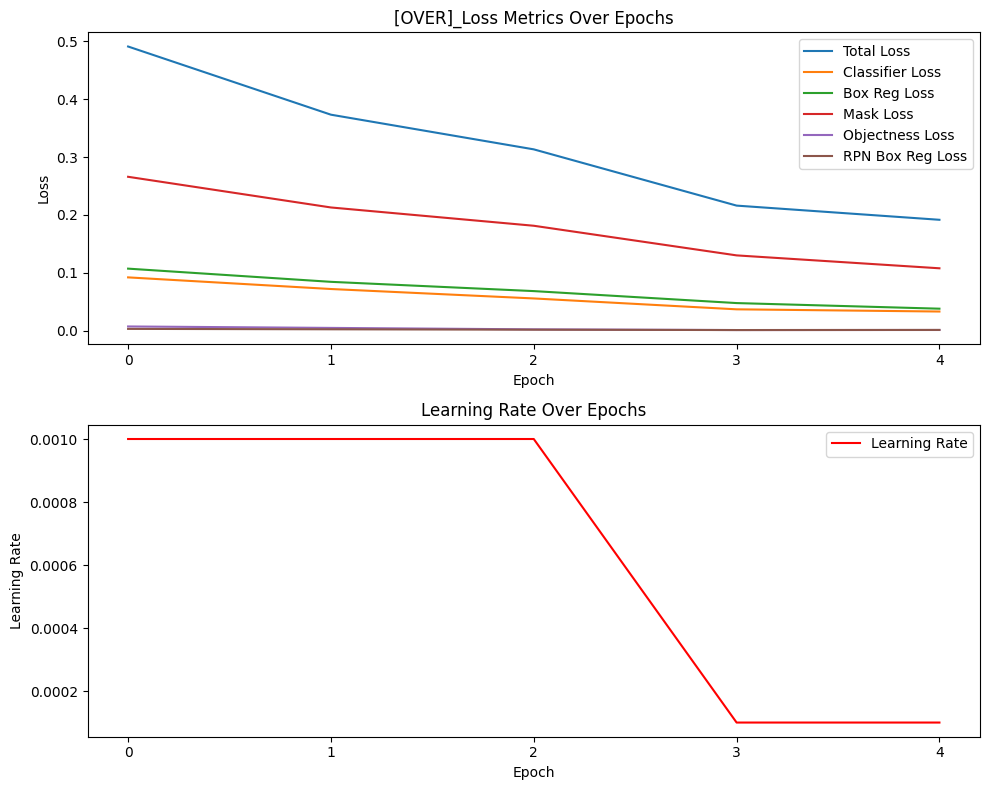

In [40]:
import matplotlib.pyplot as plt
from collections import defaultdict

# 주어진 데이터
data = {0: [{'lr': 0.001, 'loss': 0.4911, 'loss_classifier': 0.0922, 'loss_box_reg': 0.1073, 'loss_mask': 0.266, 'loss_objectness': 0.0074, 'loss_rpn_box_reg': 0.0032, 'time': 0.5248, 'data_time': 0.0173, 'max_mem': 5990}],
        1: [{'lr': 0.001, 'loss': 0.3733, 'loss_classifier': 0.0721, 'loss_box_reg': 0.0845, 'loss_mask': 0.213, 'loss_objectness': 0.0049, 'loss_rpn_box_reg': 0.0025, 'time': 0.5319, 'data_time': 0.0236, 'max_mem': 5991}],
        2: [{'lr': 0.001, 'loss': 0.3134, 'loss_classifier': 0.0558, 'loss_box_reg': 0.0685, 'loss_mask': 0.1814, 'loss_objectness': 0.0024, 'loss_rpn_box_reg': 0.0018, 'time': 0.5252, 'data_time': 0.0161, 'max_mem': 5991}],
        3: [{'lr': 0.0001, 'loss': 0.2162, 'loss_classifier': 0.037, 'loss_box_reg': 0.0478, 'loss_mask': 0.1302, 'loss_objectness': 0.0012, 'loss_rpn_box_reg': 0.0012, 'time': 0.5306, 'data_time': 0.0176, 'max_mem': 5992}],
        4: [{'lr': 0.0001, 'loss': 0.1917, 'loss_classifier': 0.0332, 'loss_box_reg': 0.0381, 'loss_mask': 0.1079, 'loss_objectness': 0.0013, 'loss_rpn_box_reg': 0.0014, 'time': 0.5308, 'data_time': 0.0169, 'max_mem': 5992}]}

# 데이터를 처리하기 쉬운 형태로 변환
epochs = list(data.keys())
losses = [entry[0]['loss'] for entry in data.values()]
loss_classifier = [entry[0]['loss_classifier'] for entry in data.values()]
loss_box_reg = [entry[0]['loss_box_reg'] for entry in data.values()]
loss_mask = [entry[0]['loss_mask'] for entry in data.values()]
loss_objectness = [entry[0]['loss_objectness'] for entry in data.values()]
loss_rpn_box_reg = [entry[0]['loss_rpn_box_reg'] for entry in data.values()]
lr = [entry[0]['lr'] for entry in data.values()]

# 시각화
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs, losses, label='Total Loss')
plt.plot(epochs, loss_classifier, label='Classifier Loss')
plt.plot(epochs, loss_box_reg, label='Box Reg Loss')
plt.plot(epochs, loss_mask, label='Mask Loss')
plt.plot(epochs, loss_objectness, label='Objectness Loss')
plt.plot(epochs, loss_rpn_box_reg, label='RPN Box Reg Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('[OVER]_Loss Metrics Over Epochs')
plt.xticks(epochs)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, lr, label='Learning Rate', color='r')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Over Epochs')
plt.legend()

plt.tight_layout()
plt.xticks(epochs)
plt.show()
